<a href="https://colab.research.google.com/github/iKatePy/Study_projects/blob/master/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A6%D0%9A_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание кейса**

>К нам обратился клиент, который занимается сборкой и продажей персональных
компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом
популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п.,
за последние несколько лет, а также с целью привлечения большего числа
клиентов при одновременном снижении затрат на содержание собственного
магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайн рынок в ближайшие 3 месяца.
<br> В связи с этим клиент хотел бы узнать, от чего
зависит цена, а также популярность персональных компьютеров, выкладываемых
на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные
по техническим характеристикам компьютеры и продавать их по конкурентной
цене.

В течение ближайших 3 месяцев выйти на онлайн-рынок (Wildberries, Ozon, OnlineTrade и др.) с ассортиментом персональных компьютеров, ориентированных на востребованные технические характеристики, обеспечив конкурентоспособную цену и снизив затраты на содержание магазина, доставку и рекламу на 10%, с целью увеличения клиентской базы и роста продаж.
<br>Цель анализа данных	Определить ключевые факторы ценообразования и популярности ПК для оптимизации ассортимента и ценовой стратегии

Какая **информация важна** для нашего коллеги-маркетолога:
идентификатор товара (product_id)
1. наименование товара (title)
2. цена товара в руб. (price)
3. количество продаж (sales)
4. количество отзывов (feedbacks)
5. наименование продавца (seller)
6. рейтинг продавца (seller_rating)
7. данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип), о количестве ядер процессора (Количество ядер процессора)
8. данные об оперативной памяти (Оперативная память), в т. ч. о типе оперативной памяти (Тип оперативной памяти), об объеме оперативной памяти (Объем оперативной памяти (Гб))
9. данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD (Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)
10. данные о видеопроцессоре (Видеопроцессор)
11. данные об операционной системе (Операционная система)
12. данные о гарантийном сроке (Гарантийный срок)
13. страна производства (Страна производства)
14. данные о габарите товара (Габариты товара), в т. ч. о ширине предмета (Ширина предмета), о глубине предмета (Глубина предмета), о высоте предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))
15. данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т. ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),
о высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с упаковкой (кг))


**Формат файла** по результатам предобработки: *xlsx* или *csv*

Основной бизнес-задачей можнт быть

- найти конкурентоспособную цену
- снижение затрат на содержание магазина, доставку и рекламу на 10%
- увеличение клиентской базы и рост продаж

# **Изучение данных**

## Импорт библиотек

In [5]:
pip install catboost

In [6]:
# Загрузка сторонних виджетов
from google.colab import output
output.enable_custom_widget_manager()
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns
# импортируем регулярные выражения
import re
# Для красивой таблицы
from tabulate import tabulate
# Для анализа
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor, Pool
# Для настройки гиперпараметров
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)})

## Подгрузка файла

подгрузка файла в среду выполнения кода Colab с персонального компьютера

In [8]:
uploaded = files.upload()

## Чтение файла

In [9]:
df = pd.read_csv('wb_pc_hard.csv')

Параметр *sep* не указываем, т.к. по умолчанию sep=',' (что соответствует используемому разделителю в нашем файле)

## Обзор датасета

In [10]:
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [11]:
df.shape

(4500, 16)

In [12]:
df.info() # Рассмотри есть ли пустые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## Выявление проблем

Наличие дубликатов


Наличие незаполненных значений


Наличие вложенных значений


Приведение признаков в необходимый формат


Наличие закодированных значений


Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных


Признаки, не представляющие интерес в рамках кейса:

    Мини-ПК и моноблоки исключены из ассортимента, поэтому данные о них не нужны.

    Избыточные детали, не влияющие на цену и популярность, например, точные размеры упаковки, если не влияют на стоимость логистики.

    Данные о брендах клавиатур и периферии, если не входят в сборку ПК.

    Габариты товара оставим на случай, если они оказывает влияние на стоимость доставки и в итоге на цену товара


# **Предобработка данных**

## Исключение признаков, не представляющих ценности в рамках кейса

In [13]:
# создадим копию датасета и посмотрим, какие колонки в нем присутствуют
df_copy = df.copy()
df_copy.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)'],
      dtype='object')

In [14]:
# Найдем мини-ПК и моноблоки, так как клиенту не важна информация о них
mask = df_copy['title'].str.contains('мини[- ]?пк|моноблок|aio', case=False, na=False)

# Получаем подтаблицу с Мини-ПК и моноблоками
mini_pc_monoblock_df = df[mask]

print(mini_pc_monoblock_df)

# Удаляем эти строки, оставляя остальные
df_filtered = df_copy[~mask].reset_index(drop=True)

      product_id                                              title   price  \
79      29092367  Компьютер Chuwi Herobox 8/256 Гб / Мини ПК, не...  20209₽   
80      32021475  Мини-ПК (неттоп)/ Beelink GK mini/ 8Гб/256Гб/ ...  16005₽   
109     41125833                 Мини ПК 4k Beelink GK Mini 8/256 G  16350₽   
110     41125833                 Мини ПК 4k Beelink GK Mini 8/256 G  16350₽   
307     57405914  моноблок PRITTEC Платформа моноблока Prittec H...  37580₽   
...          ...                                                ...     ...   
3445   149951939  Мини ПК Azerty AZ-0018 (Intel i5 2x2.5GHz, 8Gb...  17180₽   
3446   149952979  Мини ПК Azerty AZ-0019 (Intel i7 2x2.9GHz, 8Gb...  19880₽   
3447   149955073  Мини ПК Azerty AZ-0019 (Intel i7 2x2.9GHz, 8Gb...  21120₽   
3448   149956632  Мини ПК Azerty AZ-0020 (Intel i3 2x2.4GHz, 8Gb...  14811₽   
3449   149958073  Мини ПК Azerty AZ-0020 (Intel i3 2x2.4GHz, 8Gb...  16500₽   

                    sales   feedbacks        seller

In [15]:
# Список колонок, которые хотим оставить, выберем габариты товара без упаковки для анализа
columns_to_keep = [
    'product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
    'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
    'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
    'Страна производства', 'Габариты товара'
]

df_cleaned = df_filtered[columns_to_keep].copy()

# Проверяем результат
print(df_cleaned.columns)

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара'],
      dtype='object')


Теперь можно удалить колонку Title. Она была полезна для исключения мини-ПК, но теперь не представляет интереса, так как идентификатор компьютера есть в product_id, а остальные характеристики присутствуют в других колонках

In [16]:
df_cleaned.drop('title', axis=1, inplace=True)

In [17]:
# Проверим датасет
print(df_cleaned.columns)

Index(['product_id', 'price', 'sales', 'feedbacks', 'seller', 'seller_rating',
       'Процессор', 'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'Гарантийный срок', 'Страна производства',
       'Габариты товара'],
      dtype='object')


In [18]:
# проверяем размер
df_cleaned.shape

(4411, 14)

Данные успешно загружены с помощью pandas.
Было выполнено:


  Вывод первых строк (df.head())

  Проверка типов данных (df.dtypes)

  Удаление нерелевантных для анализа строк и столбцов

## Проверка и исключение дубликатов

In [19]:
df_cleaned.duplicated().sum()

np.int64(482)

In [20]:
# исключение дубликатов по всем признакам датафрейма
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.duplicated().sum()

np.int64(0)

In [21]:
# контроль размеров датафрейма
df_cleaned.shape

(3929, 14)

## Обработка пропущенных значений

In [22]:
df_cleaned.isna().sum()

,0
product_id,0
price,1
sales,2939
feedbacks,0
seller,96
seller_rating,97
Процессор,0
Оперативная память,0
Жесткий диск,0
Видеопроцессор,0


## Рассмотрим, что находится внутри каждого из признаков

In [23]:
unique_sales = df_cleaned['price'].unique()
print(unique_sales)

['10805₽' '32900₽' '35720₽' ... '21988₽' '4219₽' '77250₽']


In [24]:
unique_sales = df_cleaned['sales'].unique()
print(unique_sales)

['Купили более 400 раз' nan 'Купили более 10 раз' 'Купили более 200 раз'
 'Купили более 40 раз' 'Купили более 5 раз' 'Купили более 30 раз'
 'Купили более 20 раз' 'Купили более 50 раз' 'Купили менее 5 раз'
 'Купили более 500 раз' 'Купили более 100 раз' 'Купили более 80 раз'
 'Купили более 800 раз' 'Купили более 90 раз' 'Купили более 300 раз'
 'Купили более 60 раз' 'Купили более 70 раз' 'Купили более 5\xa0200 раз']


In [25]:
unique_sales = df_cleaned['Гарантийный срок'].unique()
print(unique_sales)

['3года' nan '3 Года (36 месяцев)' '6 мес.' '3 года' '36 мес'
 '1 (один) год' '36 месяцев' '12 месяцев,' '24 мес' '12 месяцев' '12 мес'
 '1 год' '6 мес' '7 дней' '30 дней' '24 месяца' '12 мес.' '2 года'
 '6 месяцев' '36 мес.' '12' '3 месяца' '1' '14 дней' '365; дней'
 '1 год; 12 мес' '1 год; 12 месяцев' '1 месяц' '2 месяца'
 '12 месяцев от King Komp' '12 месяцев от KING KOMP' '1 год (12 месяцев)']


In [26]:
unique_sales = df_cleaned['Страна производства'].unique()
print(unique_sales)

['Россия' 'Китай' nan 'США' 'Франция' 'Тайвань' 'Малайзия' 'Япония'
 'Швейцария' 'Вьетнам' 'Беларусь']


In [27]:
unique_sales = df_cleaned['seller_rating'].unique()
print(unique_sales)

[nan 4.7 4.3 0.  4.6 4.4 3.4 4.1 4.2 5.  4.  3.8 4.8 4.9 3.1 4.5 3.7 1.5
 3.5 3.9 3.3 3.6 3. ]


In [28]:
unique_sales = df_cleaned['seller'].unique()
print(unique_sales)

[nan 'Robotcomp' 'Market-77.ru' 'AXXES' 'САТЕЛЛИТ' 'Flash-ca' 'Фотосклад'
 'Roo24.ru' 'koiko' 'Innopax' 'Кравец А. С.' 'Карасёв Максим Павлович'
 'TERABYTE' 'Позитроника' 'Chip computers' 'Кравец С. П.' 'Гудилина И. А.'
 'OptZone' 'FUTUREMAG' 'KiBor' 'Семенова Н. С.' 'Zipov' 'Клеткин В. Д.'
 'Бесшумный Компьютер' 'mrm-power' 'BeastPC' 'Удачный Подарок' 'FLAMEFOX'
 'Droid-box.ru' 'Пелевин В. В.' 'TOPIFY' 'Неупокоев Михаил Михайлович'
 'Electronics51' 'DIY Light with ppfd.kz' 'Эстуаль' 'Компьютерс'
 'ABS-TECHNO.RU' 'GENERAL MICROWAVE' 'TINAVINA' 'Мир Репитеров' 'Acs Shop'
 'TopSpare' 'ЗЕОН' 'MERKA' 'GIGAMART' 'ScanerAvto' 'Мингалёв' 'МИР'
 'Товары для дома' 'Rus-Shop' 'Buchok' 'Русаков М. В.' 'XEON STORE'
 'smartkkt' 'РЕТ - компьютерный супермаркет' 'RgCom' '4T-Computer Store'
 'АйТи-Изи' 'IT-Lavka' 'D-Tora' 'FREERIDE' 'SATEG' 'DECK' '1932 Toys'
 'Partslog' 'DNSBOX' 'Линуксцентр' 'Меджидов Ш. А.' 'Chuwi.by' 'ФРИМЕН'
 'Кастом ПК' 'OptSale' 'Axel shop' 'KSKSHOP' 'ЖЕЛЕЗНЫЙ ДВОРИК' 'Континен

Можно предложить следующие способы обработки пропусков

| Признак          | Пропуски | Особенности значений и рекомендации по заполнению                                                                                   |
|------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------|
| price            | 1        | Заполнить медианой цены (т.к. всего 1 пропуск), либо удалить строку                                                                  |
| sales            | 2939     | Значения в формате «Купили более N раз», много NaN.<br>Рекомендация:<br>- Извлечь число N (число продаж)<br>- Пропуски заполнить 0 (предположительно отсутствие продаж) |
| seller           | 96       | Много уникальных продавцов, пропуски - 96<br>Рекомендация: заполнить 'Unknown' (неизвестный продавец)                                |
| seller_rating    | 97       | Числовые оценки, пропуски - 97<br>Рекомендация: заполнить медианным рейтингом                                                       |
| Гарантийный срок | 1601     | Разнообразные форматы, много пропусков<br>Рекомендация:<br>- Стандартизировать значения (привести к месяцам)<br>- Пропуски заполнить 'Без гарантии' или 0 месяцев               |
| Страна производства | 1680   | Несколько стран, много пропусков<br>Рекомендация: заполнить 'Не указано' или 'Unknown'                                               |

In [29]:
# Убираем символ '₽' и пробелы в price, преобразуем в число
df_cleaned['price'] = df_cleaned['price'].astype(str).str.replace('₽', '').str.replace('\xa0', '').str.strip()

# Преобразуем в числовой тип (int), ошибки преобразования в NaN
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Заполняем пропуски медианой
median_price = df_cleaned['price'].median()
df_cleaned['price'] = df_cleaned['price'].fillna(median_price)

# Проверяем результат
print(df_cleaned['price'].head())

0    10805.0
1    32900.0
2    35720.0
3    39237.0
4    76188.0
Name: price, dtype: float64


In [30]:
# Заполним пропуски в seller на слово 'Unknown'
df_cleaned['seller'] = df_cleaned['seller'].fillna('Unknown')

In [31]:
# Заполним пропуски в seller_rating на медианное значение
median_rating = df_cleaned['seller_rating'].median()
df_cleaned['seller_rating'] = df_cleaned['seller_rating'].fillna(median_rating)

In [32]:
# Обработка пропусков в Стране производства
df_cleaned['Страна производства'] = df_cleaned['Страна производства'].fillna('Unknown')

In [33]:
# Обработка пропусков в Гарантийный срок
# Приводим к числу месяцев, пропуски заменяем на 0 (без гарантии)
def warranty_to_months(s):
    if pd.isna(s):
        return 0
    s = s.lower().replace(' ', '').replace(',', '').replace('.', '')
    match = re.search(r'(\d+)', s)
    if match:
        num = int(match.group(1))
        if 'год' in s or 'года' in s or 'лет' in s:
            return num * 12
        # Если есть слова "месяц", "мес" или подобные, возвращаем число как есть
        return num
    return 0

df_cleaned['warranty_months'] = df_cleaned['Гарантийный срок'].apply(warranty_to_months)

In [34]:
# Проверяем, что код сработал
unique_sales = df_cleaned['warranty_months'].unique()
print(unique_sales)

[ 36   0   6  12  24   7  30   3   1  14 365   2]


In [35]:
print(df_cleaned.columns)

Index(['product_id', 'price', 'sales', 'feedbacks', 'seller', 'seller_rating',
       'Процессор', 'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'Гарантийный срок', 'Страна производства',
       'Габариты товара', 'warranty_months'],
      dtype='object')


In [36]:
# Убираем необработанный столбец
df_cleaned.drop('Гарантийный срок', axis=1, inplace=True)

In [37]:
# Проверяем результат
print(df_cleaned.columns)

Index(['product_id', 'price', 'sales', 'feedbacks', 'seller', 'seller_rating',
       'Процессор', 'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'Страна производства', 'Габариты товара',
       'warranty_months'],
      dtype='object')


In [38]:
# Обрабатываем sales
def extract_sales_num(s):
    if pd.isna(s):
        return 0
    # Убираем неразрывные пробелы и ищем число
    match = re.search(r'\d+', s.replace('\xa0', ''))
    return int(match.group()) if match else 0

df_cleaned['sales_num'] = df_cleaned['sales'].apply(extract_sales_num)

In [39]:
unique_sales = df_cleaned['sales_num'].unique()
print(unique_sales)

[ 400    0   10  200   40    5   30   20   50  500  100   80  800   90
  300   60   70 5200]


In [40]:
# Убираем необработанный столбец
df_cleaned.drop('sales', axis=1, inplace=True)

In [41]:
# Проверяем результат
print(df_cleaned.columns)

Index(['product_id', 'price', 'feedbacks', 'seller', 'seller_rating',
       'Процессор', 'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'Страна производства', 'Габариты товара',
       'warranty_months', 'sales_num'],
      dtype='object')


In [42]:
# Снова проверим на пропуски
df_cleaned.isna().sum()

,0
product_id,0
price,0
feedbacks,0
seller,0
seller_rating,0
Процессор,0
Оперативная память,0
Жесткий диск,0
Видеопроцессор,0
Операционная система,0


Произведена очистка датасета от пропусков и дубликатов

## Распаковка вложенных структур данных

In [43]:
df_cleaned.head(3)

,product_id,price,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Страна производства,Габариты товара,warranty_months,sales_num
0,10148385,10805.0,7 отзывов,Unknown,4.7,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...",36,400
1,17877962,32900.0,0 отзывов,Unknown,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...",0,0
2,17880420,35720.0,0 отзывов,Unknown,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,Unknown,"{'Ширина предмета': None, 'Глубина предмета': ...",0,0


Необходимо обработать столбцы Процессор, Оперативная память, Жесткий диск, Габариты товара

In [44]:
df_cleaned['Процессор'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [45]:
df_cleaned['Оперативная память'][0]

"{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}"

In [46]:
df_cleaned['Жесткий диск'][0]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}"

In [47]:
df_cleaned['Габариты товара'][0]

"{'Ширина предмета': '28.5 см', 'Глубина предмета': '40 см', 'Высота предмета': '9.6 см', 'Вес без упаковки (кг)': '3.5 кг'}"

Обработаем признаки:

In [48]:
def safe_json_loads(text):
    '''Безопасно парсим JSON из строки, возвращаем None при ошибках'''
    if pd.isna(text):
        return None
    text = text.strip()
    if not text:
        return None
    try:
        # Заменяем одинарные кавычки на двойные, если нужно
        return json.loads(text.replace("'", '"'))
    except json.JSONDecodeError:
        return None

In [49]:
# Функция распаковки для Процессора
def extract_processor_info(text):
    if pd.isna(text):
        return pd.Series({'Процессор_тип': 'Не указано', 'Количество_ядер': 'Не указано'})
    else:
        data = json.loads(text.replace("'", '"'))
        return pd.Series({
            'Процессор_тип': data.get('Процессор_тип', 'Не указано'),
            'Количество_ядер': data.get('Количество ядер процессора', 'Не указано')
        })

# Применяем функцию к столбцу 'Процессор' и расширяем DataFrame двумя новыми столбцами
df_cleaned[['Процессор_тип', 'Количество_ядер']] = df_cleaned['Процессор'].apply(extract_processor_info)

In [50]:
# Функция для оперативной памяти
def extract_ram_info(text):
    data = safe_json_loads(text)
    if data is None:
        return pd.Series({
            'Тип_оперативной_памяти': 'Не указано',
            'Объем_оперативной_памяти_Гб': 'Не указано'
        })
    return pd.Series({
        'Тип_оперативной_памяти': data.get('Тип оперативной памяти', 'Не указано'),
        'Объем_оперативной_памяти_Гб': data.get('Объем оперативной памяти (Гб)', 'Не указано')
    })

# Функция для Жесткого диска
def extract_disk_info(text):
    data = safe_json_loads(text)
    if data is None:
        return pd.Series({
            'Объем_накопителя_HDD': 'Не указано',
            'Объем_накопителя_SSD': 'Не указано'
        })
    return pd.Series({
        'Объем_накопителя_HDD': data.get('Объем накопителя HDD', 'Не указано'),
        'Объем_накопителя_SSD': data.get('Объем накопителя SSD', 'Не указано')
    })

# Функция для габаритов
def extract_dimensions_info(text):
    data = safe_json_loads(text)
    if data is None:
        return pd.Series({
            'Ширина_см': 'Не указано',
            'Глубина_см': 'Не указано',
            'Высота_см': 'Не указано',
            'Вес_кг': 'Не указано'
        })
    return pd.Series({
        'Ширина_см': data.get('Ширина предмета', 'Не указано'),
        'Глубина_см': data.get('Глубина предмета', 'Не указано'),
        'Высота_см': data.get('Высота предмета', 'Не указано'),
        'Вес_кг': data.get('Вес без упаковки (кг)', 'Не указано')
    })

In [51]:
# Применим функции к оставшимся признакам
df_cleaned[['Тип_оперативной_памяти', 'Объем_оперативной_памяти_Гб']] = df_cleaned['Оперативная память'].apply(extract_ram_info)
df_cleaned[['Объем_накопителя_HDD', 'Объем_накопителя_SSD']] = df_cleaned['Жесткий диск'].apply(extract_disk_info)
df_cleaned[['Ширина_см', 'Глубина_см', 'Высота_см', 'Вес_кг']] = df_cleaned['Габариты товара'].apply(extract_dimensions_info)

In [52]:
# Убираем необработанные столбцы
df_cleaned.drop('Процессор', axis=1, inplace=True)
df_cleaned.drop('Оперативная память', axis=1, inplace=True)
df_cleaned.drop('Жесткий диск', axis=1, inplace=True)
df_cleaned.drop('Габариты товара', axis=1, inplace=True)

In [53]:
df_cleaned.head(1)

,product_id,price,feedbacks,seller,seller_rating,Видеопроцессор,Операционная система,Страна производства,warranty_months,sales_num,Процессор_тип,Количество_ядер,Тип_оперативной_памяти,Объем_оперативной_памяти_Гб,Объем_накопителя_HDD,Объем_накопителя_SSD,Ширина_см,Глубина_см,Высота_см,Вес_кг
0,10148385,10805.0,7 отзывов,Unknown,4.7,Intel HD Graphics,отсутствует,Россия,36,400,Intel Celeron,2,DDR 3,4 ГБ,Не указано,Не указано,28.5 см,40 см,9.6 см,3.5 кг


In [54]:
df_cleaned['Вес_кг'].unique().sum()

'3.5 кгНе указано7 кг9 кг11 кг8 кг2 кг6.5 кг4.5 кг5 кг0.5 кг0.05 кг4 кг7.2 кг3 кг6 кг1.2 кг1.25 кг7.5 кг12 кг1.5 кг5.97 кг0.4 кг1 кг4.4 кг5.5 кг9.8 кг9.5 кг7.9 кг7.3 кг14 кг7.4 кг0.66 кг1.7 кг4.7 кг5.3 кг0.2 кг0.52 кг0.1 кг5.8 кг4.6 кг3.2 кг13 кг4.48 кг10 кг20 кг19 кг14.5 кг6.6 кг8.3 кг6.7 кг5.2 кг'

In [55]:
# Универсальная функция для очистки и извлечения числовых значений из строк с единицами измерения
def extract_numeric_value(value, units_in_tb=False):
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()
    missing_values = ['не указано', 'нет', 'отсутствует', 'не заполнено', 'без hdd', 'нет hdd', '']
    if text in missing_values:
        return np.nan

    text = text.replace(';', '').replace(' ', '')
    match = re.search(r'(\d+(\.\d+)?)', text)
    if not match:
        return np.nan

    number = float(match.group(1))
    if units_in_tb and ('тб' in text or 'tb' in text):
        number *= 1024

    return number

# Функция для очистки типа оперативной памяти
def clean_ram_type(value):
    if pd.isna(value):
        return 'Не указано'

    text = str(value).lower().strip()
    missing_values = ['не заполнено', 'не указано', 'нет', '']
    if text in missing_values:
        return 'Не указано'

    ddr_match = re.search(r'ddr\s*([345])', text)
    if ddr_match:
        return 'DDR ' + ddr_match.group(1)

    if re.search(r'\d+\s*gb', text) or 'ram' in text:
        return 'Не указано'

    return str(value).strip().title()

# Применение функций к столбцам DataFrame

# Очистка и замена типа оперативной памяти
df_cleaned['Тип_оперативной_памяти'] = df_cleaned['Тип_оперативной_памяти'].apply(clean_ram_type)

# Очистка и замена объема оперативной памяти
df_cleaned['Объем_оперативной_памяти_Гб'] = df_cleaned['Объем_оперативной_памяти_Гб'].apply(extract_numeric_value).fillna(0).astype(int)

# Очистка и замена объема HDD и SSD (с учетом Тб)
df_cleaned['Объем_накопителя_HDD'] = df_cleaned['Объем_накопителя_HDD'].apply(lambda x: extract_numeric_value(x, units_in_tb=True)).fillna(0)
df_cleaned['Объем_накопителя_SSD'] = df_cleaned['Объем_накопителя_SSD'].apply(lambda x: extract_numeric_value(x, units_in_tb=True)).fillna(0)

# Очистка размеров - создаём временные колонки с суффиксом _число
for dim in ['Ширина_см', 'Глубина_см', 'Высота_см']:
    df_cleaned[f'{dim}_число'] = df_cleaned[dim].apply(extract_numeric_value)

# Очистка веса - создаём временную колонку
df_cleaned['Вес_кг_число'] = df_cleaned['Вес_кг'].apply(extract_numeric_value)

# Заменяем исходные колонки размерами и весом на очищенные числовые
for dim in ['Ширина_см', 'Глубина_см', 'Высота_см']:
    df_cleaned[dim] = df_cleaned[f'{dim}_число']

df_cleaned['Вес_кг'] = df_cleaned['Вес_кг_число']

# Удаляем временные колонки с суффиксом _число
cols_to_drop = [col for col in df_cleaned.columns if col.endswith('_число')]
df_cleaned.drop(columns=cols_to_drop, inplace=True)

# Теперь df_cleaned содержит очищенные числовые колонки вместо исходных с текстом

In [56]:
# Проверка результатов
df_cleaned.head(2)

,product_id,price,feedbacks,seller,seller_rating,Видеопроцессор,Операционная система,Страна производства,warranty_months,sales_num,Процессор_тип,Количество_ядер,Тип_оперативной_памяти,Объем_оперативной_памяти_Гб,Объем_накопителя_HDD,Объем_накопителя_SSD,Ширина_см,Глубина_см,Высота_см,Вес_кг
0,10148385,10805.0,7 отзывов,Unknown,4.7,Intel HD Graphics,отсутствует,Россия,36,400,Intel Celeron,2,DDR 3,4,0.0,0.0,28.5,40.0,9.6,3.5
1,17877962,32900.0,0 отзывов,Unknown,4.7,не заполнено,отсутствует,Китай,0,0,Intel Core i5,не заполнено,Не указано,16,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
# Процент пропусков в каждом столбце
missing_percent = df_cleaned.isna().mean() * 100
print("Процент пропусков в столбцах:")
print(missing_percent.sort_values(ascending=False))

Процент пропусков в столбцах:
Вес_кг                         58.589972
Высота_см                      58.589972
Глубина_см                     58.589972
Ширина_см                      58.589972
seller                          0.000000
feedbacks                       0.000000
price                           0.000000
product_id                      0.000000
seller_rating                   0.000000
Видеопроцессор                  0.000000
Операционная система            0.000000
Страна производства             0.000000
Количество_ядер                 0.000000
Процессор_тип                   0.000000
sales_num                       0.000000
warranty_months                 0.000000
Объем_накопителя_SSD            0.000000
Объем_накопителя_HDD            0.000000
Объем_оперативной_памяти_Гб     0.000000
Тип_оперативной_памяти          0.000000
dtype: float64


In [58]:
print(df_cleaned.columns)

Index(['product_id', 'price', 'feedbacks', 'seller', 'seller_rating',
       'Видеопроцессор', 'Операционная система', 'Страна производства',
       'warranty_months', 'sales_num', 'Процессор_тип', 'Количество_ядер',
       'Тип_оперативной_памяти', 'Объем_оперативной_памяти_Гб',
       'Объем_накопителя_HDD', 'Объем_накопителя_SSD', 'Ширина_см',
       'Глубина_см', 'Высота_см', 'Вес_кг'],
      dtype='object')


In [59]:
# Приведем отзывы к числовым значениям
def extract_feedback_number(text):
    """
    Извлекает число из строки с отзывами, например из '7 отзывов' -> 7.
    Если число не найдено, возвращает NaN.
    """
    if pd.isna(text):
        return np.nan
    text = str(text).lower()
    match = re.search(r'\d+', text)
    if match:
        return int(match.group())
    else:
        return np.nan

# Применяем функцию к столбцу 'feedbacks'
df_cleaned['feedbacks_clean'] = df_cleaned['feedbacks'].apply(extract_feedback_number)

# Заменим исходный столбец на очищенный и заполним пропуски нулями:
df_cleaned['feedbacks'] = df_cleaned['feedbacks_clean'].fillna(0).astype(int)

# Удалим временный столбец
df_cleaned.drop(columns=['feedbacks_clean'], inplace=True)

# Проверяем результат
print(df_cleaned['feedbacks'].head())

0     7
1     0
2     0
3     1
4    94
Name: feedbacks, dtype: int64


In [60]:
# Обработаем Количество_ядер
df_cleaned['Количество_ядер'].unique()

array(['2', 'не заполнено', '6', '10', '4', '12', '16', '8', '2 ядра',
       '6 ядер', '8 Ядер 16 потоков', '4 ядра', '8 ядер', '14', '20',
       '24 ядра'], dtype=object)

In [61]:
# Очистим столбец Количество_ядер
def clean_cores(value):
    """
    Извлекает первое число из строки и возвращает его как int.
    Если число не найдено или значение пропущено, возвращает NaN.
    """
    if pd.isna(value):
        return np.nan
    text = str(value).lower()
    match = re.search(r'\d+', text)
    if match:
        return int(match.group())
    else:
        return np.nan

# Применяем функцию к столбцу 'Количество_ядер'
df_cleaned['Количество_ядер_число'] = df_cleaned['Количество_ядер'].apply(clean_cores)

# Заменяем исходный столбец на числовой (если хотите)
df_cleaned['Количество_ядер'] = df_cleaned['Количество_ядер_число']

# Удаляем временный столбец
df_cleaned.drop(columns=['Количество_ядер_число'], inplace=True)

# Проверяем результат
print(df_cleaned['Количество_ядер'].value_counts())

Количество_ядер
6.0     1469
4.0      794
8.0      438
2.0      285
12.0     284
10.0     130
24.0      60
16.0      48
14.0       7
20.0       7
Name: count, dtype: int64


In [62]:
df_cleaned.head(3)

,product_id,price,feedbacks,seller,seller_rating,Видеопроцессор,Операционная система,Страна производства,warranty_months,sales_num,Процессор_тип,Количество_ядер,Тип_оперативной_памяти,Объем_оперативной_памяти_Гб,Объем_накопителя_HDD,Объем_накопителя_SSD,Ширина_см,Глубина_см,Высота_см,Вес_кг
0,10148385,10805.0,7,Unknown,4.7,Intel HD Graphics,отсутствует,Россия,36,400,Intel Celeron,2.0,DDR 3,4,0.0,0.0,28.5,40.0,9.6,3.5
1,17877962,32900.0,0,Unknown,4.7,не заполнено,отсутствует,Китай,0,0,Intel Core i5,NaN,Не указано,16,0.0,0.0,NaN,NaN,NaN,NaN
2,17880420,35720.0,0,Unknown,4.7,не заполнено,отсутствует,Unknown,0,0,не заполнено,NaN,Не указано,16,0.0,0.0,NaN,NaN,NaN,NaN


In [63]:
# В столбце Тип_оперативной_памяти_чистый есть строки из другого столбца, так как их всего 3 - уберем их
counts = df_cleaned['Тип_оперативной_памяти'].value_counts()
print(counts)

Тип_оперативной_памяти
DDR 4         3097
Не указано     504
DDR 3          311
DDR 5           14
16               2
16 Гб            1
Name: count, dtype: int64


Уберем лишние строки, в которых указаны неверные значения

In [64]:
df_cleaned = df_cleaned[~df_cleaned['Тип_оперативной_памяти'].isin(['16', '16 Гб'])]

In [65]:
counts = df_cleaned['Тип_оперативной_памяти'].value_counts()
print(counts)

Тип_оперативной_памяти
DDR 4         3097
Не указано     504
DDR 3          311
DDR 5           14
Name: count, dtype: int64


## Преобразование данных в необходимый формат

In [66]:
# Часть преобразований уже сделаны, посмотрим какие типы данных есть в таблице
df_cleaned.dtypes

,0
product_id,int64
price,float64
feedbacks,int64
seller,object
seller_rating,float64
Видеопроцессор,object
Операционная система,object
Страна производства,object
warranty_months,int64
sales_num,int64


In [67]:
# Преобразуем к общему виду
counts = df_cleaned['Операционная система'].value_counts()
print(counts)

Операционная система
Windows 10 Pro                                   1746
Windows 11 Pro                                    665
отсутствует                                       570
Windows 10                                        381
windows пробная                                   223
Windows 10 Pro Trial                               76
Windows 10 Home                                    58
Free DOS                                           44
Windows 11                                         38
Windows                                            37
Windows 10 пробная                                 23
windows 10 trial                                   19
macOS                                               7
Windows 11 Home                                     5
windows 10                                          4
WINDOWS 10                                          4
Windows 10 pro                                      3
Windows 10 Home пробная                             3
WINDOWS

In [68]:
def simplify_os_with_pro_home(os_name):
    if pd.isna(os_name):
        return 'Отсутствует'
    os_name = str(os_name).lower()

    if 'windows 10 pro' in os_name:
        return 'Windows 10 Pro'
    elif 'windows 10 home' in os_name:
        return 'Windows 10 Home'
    elif 'windows 11 pro' in os_name:
        return 'Windows 11 Pro'
    elif 'windows 11 home' in os_name:
        return 'Windows 11 Home'
    elif 'windows' in os_name:
        return 'Windows Другие'
    elif 'macos' in os_name or 'mac os' in os_name:
        return 'macOS'
    elif 'linux' in os_name or 'dos' in os_name:
        return 'Linux/FreeDOS'
    elif os_name in ['отсутствует', 'без oc', 'без os', 'нет']:
        return 'Отсутствует'
    else:
        return 'Другие'

df_cleaned['Операционная система'] = df_cleaned['Операционная система'].apply(simplify_os_with_pro_home)

print(df_cleaned['Операционная система'].value_counts())

Операционная система
Windows 10 Pro     1829
Windows Другие      737
Windows 11 Pro      667
Отсутствует         571
Windows 10 Home      61
Linux/FreeDOS        46
macOS                 7
Windows 11 Home       5
Другие                3
Name: count, dtype: int64


<ipython-input-68-9dffd0a7d1c3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Операционная система'] = df_cleaned['Операционная система'].apply(simplify_os_with_pro_home)


Обработаем пропуски в новых столбцах:

In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 0 to 4410
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   3926 non-null   int64  
 1   price                        3926 non-null   float64
 2   feedbacks                    3926 non-null   int64  
 3   seller                       3926 non-null   object 
 4   seller_rating                3926 non-null   float64
 5   Видеопроцессор               3926 non-null   object 
 6   Операционная система         3926 non-null   object 
 7   Страна производства          3926 non-null   object 
 8   warranty_months              3926 non-null   int64  
 9   sales_num                    3926 non-null   int64  
 10  Процессор_тип                3926 non-null   object 
 11  Количество_ядер              3519 non-null   float64
 12  Тип_оперативной_памяти       3926 non-null   object 
 13  Объем_оперативной_памят

In [70]:
duplicates_count = df_cleaned.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")

# Удаление дубликатов
df = df_cleaned.drop_duplicates()

Количество дубликатов: 0


In [71]:
# Процент пропусков в каждом столбце
missing_percent = df_cleaned.isna().mean() * 100
print("Процент пропусков в столбцах:")
print(missing_percent.sort_values(ascending=False))

Процент пропусков в столбцах:
Вес_кг                         58.583800
Высота_см                      58.583800
Глубина_см                     58.583800
Ширина_см                      58.583800
Количество_ядер                10.366786
feedbacks                       0.000000
price                           0.000000
product_id                      0.000000
seller                          0.000000
seller_rating                   0.000000
Операционная система            0.000000
Видеопроцессор                  0.000000
Процессор_тип                   0.000000
sales_num                       0.000000
warranty_months                 0.000000
Страна производства             0.000000
Объем_накопителя_SSD            0.000000
Объем_накопителя_HDD            0.000000
Объем_оперативной_памяти_Гб     0.000000
Тип_оперативной_памяти          0.000000
dtype: float64


In [72]:
# Заменим пропуски на медианные значения, так как пропусков много,
# нужно либо удалить столбцы (но они могут пригодиться при анализе)
# Либо заменить на значение, к примеру, медианы, чтобы уменьшить влияние выбросов на анализ
# Заполнение пропусков в геометрических параметрах медианой
for col in ['Ширина_см', 'Высота_см', 'Вес_кг', 'Глубина_см']:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].median())

df_cleaned.loc[:, 'Количество_ядер'] = df_cleaned['Количество_ядер'].fillna(df_cleaned['Количество_ядер'].median())

In [73]:
# Для накопителей заполним пропуски на нулевые значения
df_cleaned.loc[:, 'Объем_накопителя_HDD'] = pd.to_numeric(df_cleaned['Объем_накопителя_HDD'], errors='coerce').fillna(0)
df_cleaned.loc[:, 'Объем_накопителя_SSD'] = pd.to_numeric(df_cleaned['Объем_накопителя_SSD'], errors='coerce').fillna(0)

In [74]:
# Процент пропусков в каждом столбце
missing_percent = df_cleaned.isna().mean() * 100
print("Процент пропусков в столбцах:")
print(missing_percent.sort_values(ascending=False))

Процент пропусков в столбцах:
product_id                     0.0
price                          0.0
feedbacks                      0.0
seller                         0.0
seller_rating                  0.0
Видеопроцессор                 0.0
Операционная система           0.0
Страна производства            0.0
warranty_months                0.0
sales_num                      0.0
Процессор_тип                  0.0
Количество_ядер                0.0
Тип_оперативной_памяти         0.0
Объем_оперативной_памяти_Гб    0.0
Объем_накопителя_HDD           0.0
Объем_накопителя_SSD           0.0
Ширина_см                      0.0
Глубина_см                     0.0
Высота_см                      0.0
Вес_кг                         0.0
dtype: float64


In [75]:
# Подсчет нулей по всем столбцам
zeros = (df_cleaned == 0).sum()
print("Количество нулевых значений по столбцам:")
print(zeros[zeros > 0])

# Подсчет 'Unknown' и 'Не указано' в строковых столбцах
print("\nКоличество значений 'Unknown' или 'Не указано' в строковых столбцах:")
for col in df_cleaned.select_dtypes(include=['object']).columns:
    count = df_cleaned[col].isin(['Unknown', 'Не указано']).sum()
    if count > 0:
        print(f"{col}: {count}")

Количество нулевых значений по столбцам:
feedbacks                      3200
seller_rating                   664
warranty_months                1601
sales_num                      2936
Объем_оперативной_памяти_Гб     401
Объем_накопителя_HDD           2824
Объем_накопителя_SSD           2780
dtype: int64

Количество значений 'Unknown' или 'Не указано' в строковых столбцах:
seller: 96
Страна производства: 1680
Тип_оперативной_памяти: 504


In [76]:
print(df_cleaned.columns)


Index(['product_id', 'price', 'feedbacks', 'seller', 'seller_rating',
       'Видеопроцессор', 'Операционная система', 'Страна производства',
       'warranty_months', 'sales_num', 'Процессор_тип', 'Количество_ядер',
       'Тип_оперативной_памяти', 'Объем_оперативной_памяти_Гб',
       'Объем_накопителя_HDD', 'Объем_накопителя_SSD', 'Ширина_см',
       'Глубина_см', 'Высота_см', 'Вес_кг'],
      dtype='object')


## Проверка и сохранение датасета

### Общий датасет

In [77]:
# обзор размеров датафрейма
df_cleaned.shape

(3926, 20)

In [78]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 0 to 4410
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   3926 non-null   int64  
 1   price                        3926 non-null   float64
 2   feedbacks                    3926 non-null   int64  
 3   seller                       3926 non-null   object 
 4   seller_rating                3926 non-null   float64
 5   Видеопроцессор               3926 non-null   object 
 6   Операционная система         3926 non-null   object 
 7   Страна производства          3926 non-null   object 
 8   warranty_months              3926 non-null   int64  
 9   sales_num                    3926 non-null   int64  
 10  Процессор_тип                3926 non-null   object 
 11  Количество_ядер              3926 non-null   float64
 12  Тип_оперативной_памяти       3926 non-null   object 
 13  Объем_оперативной_памят

In [79]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_cleaned.to_excel('wb_pc_hard.xlsx', index=False)

## Выводы по разделу:
В результате проведенной предобработки был получен чистый, структурированный датасет, готовый к дальнейшему анализу. Основные проблемы — дубликаты, пропуски, нестандартные форматы данных — успешно решены. Разработаны универсальные функции для извлечения числовых значений из текста, созданы новые признаки, улучшающие аналитические возможности. Данные подготовлены для использования в задачах регрессии, классификации и визуализации

# Анализ данных

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**

1. Анализ ценообразования
Какие технические характеристики влияют на цену?
Какова рыночная стоимость аналогичных моделей?
Есть ли переоцененные или недооцененные конфигурации?
2. Анализ популярности и спроса
От чего зависит количество продаж и положительных отзывов?
Какие параметры делают ПК более привлекательным для покупателей?
3. Сегментация рынка
На какие группы можно разделить ПК по характеристикам и цене?
Какие ниши наиболее востребованы?
4. Прогнозирование спроса
Какие конфигурации будут пользоваться наибольшим спросом?
Как изменится интерес к разным категориям ПК в будущем?
5. Рекомендации по ассортименту
Какие конфигурации ПК стоит выпускать в первую очередь?
Какие параметры не приносят значительной добавленной стоимости?

**Составим таблицу для анализа и моделей**

In [80]:
analysis_tasks = pd.DataFrame([
    {
        "Задача": "Прогноз цены",
        "Целевая переменная": "price",
        "Тип задачи": "Регрессия",
        "Назначение": "Определение справедливой рыночной цены"
    },
    {
        "Задача": "Прогноз спроса",
        "Целевая переменная": "sales_num",
        "Тип задачи": "Регрессия / классификация",
        "Назначение": "Выбор востребованных моделей"
    },
    {
        "Задача": "Сегментация",
        "Целевая переменная": "-",
        "Тип задачи": "Кластеризация",
        "Назначение": "Разделение на категории: бюджетные, игровые, офисные и т.д."
    },
    {
        "Задача": "Анализ важности признаков",
        "Целевая переменная": "-",
        "Тип задачи": "Feature importance",
        "Назначение": "Выявление ключевых факторов ценообразования и популярности"
    }
])

print(tabulate(analysis_tasks, headers='keys', tablefmt='psql', showindex=False))

+---------------------------+----------------------+---------------------------+-------------------------------------------------------------+
| Задача                    | Целевая переменная   | Тип задачи                | Назначение                                                  |
|---------------------------+----------------------+---------------------------+-------------------------------------------------------------|
| Прогноз цены              | price                | Регрессия                 | Определение справедливой рыночной цены                      |
| Прогноз спроса            | sales_num            | Регрессия / классификация | Выбор востребованных моделей                                |
| Сегментация               | -                    | Кластеризация             | Разделение на категории: бюджетные, игровые, офисные и т.д. |
| Анализ важности признаков | -                    | Feature importance        | Выявление ключевых факторов ценообразования и популярности  |

1 Прогноз цены (Регрессия)

In [81]:
# Числовые признаки
num_features = ['feedbacks', 'seller_rating', 'warranty_months', 'Количество_ядер',
                'Объем_оперативной_памяти_Гб', 'Объем_накопителя_HDD', 'Объем_накопителя_SSD',
                'Ширина_см', 'Глубина_см', 'Высота_см', 'Вес_кг']

# Категориальные признаки
cat_features = ['seller', 'Видеопроцессор', 'Операционная система', 'Страна производства',
                'Процессор_тип', 'Тип_оперативной_памяти']

X = df_cleaned[num_features + cat_features]
y = df_cleaned['price']

# Разделяем на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обрабатываем числовые признаки
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_features])
X_test_num = scaler.transform(X_test[num_features])

# Обрабатываем категориальные признаки
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

# Объединяем числовые и категориальные признаки
X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])

# Обучаем модель
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model.fit(X_train_processed, y_train)

# Предсказываем и оцениваем
predictions = price_model.predict(X_test_processed)
print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
print(f"R2: {r2_score(y_test, predictions):.4f}")

MSE: 66571190.0444
R2: 0.9490


In [82]:
mean_price = df_cleaned['price'].mean()
print(mean_price)
print((66571190.0444)**0.5)

63339.98178807947
8159.11698925809


Ошибка RMSE около 8 159 при средней цене около 63 340 — это вполне приемлемый показатель ошибки для практического применения модели, это примерно 13% от средней цены

Для оценки присутствия / отсутствия переобучения нужно будет проверить на других моделях

2 Прогноз спроса (Классификация)

In [83]:
# Создаем бинарный таргет
threshold = df_cleaned['sales_num'].quantile(0.75)
df_cleaned['is_popular'] = (df_cleaned['sales_num'] >= threshold).astype(int)

y_popular = df_cleaned['is_popular']

# Используем те же признаки и разделение, что и в регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y_popular, test_size=0.2, random_state=42)

# Применяем те же трансформации, что и для регрессии
X_train_num = scaler.transform(X_train[num_features])  # scaler уже обучен на train из регрессии
X_test_num = scaler.transform(X_test[num_features])

X_train_cat = encoder.transform(X_train[cat_features])  # encoder тоже обучен
X_test_cat = encoder.transform(X_test[cat_features])

X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])

# Обучаем классификатор
popular_model = RandomForestClassifier(random_state=42)
popular_model.fit(X_train_processed, y_train)

# Предсказываем и оцениваем
predictions = popular_model.predict(X_test_processed)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       590
           1       0.80      0.69      0.74       196

    accuracy                           0.88       786
   macro avg       0.85      0.82      0.83       786
weighted avg       0.88      0.88      0.88       786





Precision (точность)

    Для класса 1 precision = 0.8 — значит, 80% предсказанных популярных товаров действительно популярны.

Recall (полнота)

    Для класса 1 recall = 0.69 — модель находит 69% всех популярных товаров, но пропускает 31%.

F1-score

    Для класса 1 f1 = 0.74 — средний показатель качества классификации популярных товаров.

Support — количество объектов каждого класса в тестовой выборке (590 непопулярных и 196 популярных).

Accuracy (общая точность) — доля всех правильно классифицированных объектов (88%)

3 Сегментация (кластеризация)

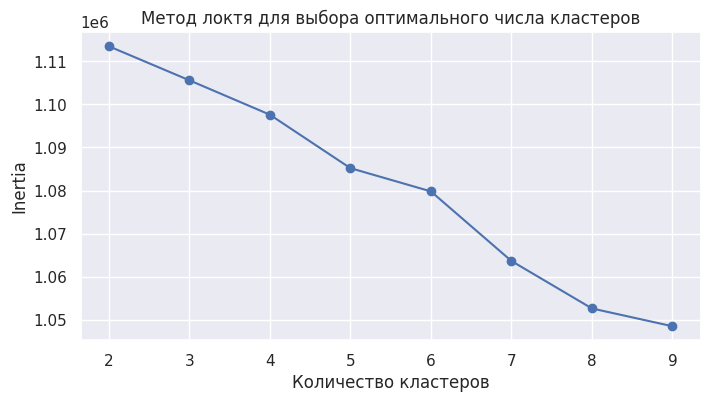

                price  sales_num  Объем_оперативной_памяти_Гб  \
cluster                                                         
0        62633.513524   6.554633                    16.442153   
1        78165.313830   0.585106                    22.382979   
2        17990.000000   0.000000                     0.000000   
3        28720.000000   0.000000                     4.000000   

         Количество_ядер  seller_rating  log_price  log_sales_num  count  
cluster                                                                   
0               6.519550       3.861489  10.783139       0.584927   3734  
1               6.744681       2.640957  11.232780       0.187746    188  
2               6.000000       0.000000   9.797627       0.000000      1  
3               4.000000       4.500000  10.263796       0.000000      3  


In [84]:
# 1. Подготовка признаков

# Логарифмическое преобразование сильно скошенных числовых признаков для уменьшения влияния выбросов
df_cleaned['log_price'] = np.log1p(df_cleaned['price'])
df_cleaned['log_sales_num'] = np.log1p(df_cleaned['sales_num'])

# Выбираем числовые признаки, важные для кластеризации
num_cols = [
    'log_price',
    'log_sales_num',
    'Объем_оперативной_памяти_Гб',
    'Количество_ядер',
    'seller_rating'
]

# Выбираем категориальные признаки
cat_cols = [
    'seller',
    'Видеопроцессор',
    'Операционная система',
    'Страна производства',
    'Процессор_тип',
    'Тип_оперативной_памяти'
]

# Извлекаем числовые и категориальные данные
X_num = df_cleaned[num_cols]
X_cat = df_cleaned[cat_cols]

# 2. Импутация пропусков в числовых признаках (если есть)
imputer = SimpleImputer(strategy='median')
X_num_imputed = imputer.fit_transform(X_num)

# 3. Кодирование категориальных признаков
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_cat)

# 4. Объединяем числовые и категориальные признаки
X_combined = np.hstack([X_num_imputed, X_cat_encoded])

# 5. Масштабируем объединённые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# 6. Метод локтя для выбора оптимального числа кластеров
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора оптимального числа кластеров')
plt.grid(True)
plt.show()

# 7. Обучаем KMeans с выбранным числом кластеров (например, 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 8. Добавляем метки кластеров в исходный датафрейм
df_cleaned['cluster'] = clusters

# 9. Анализируем кластеры — используем исходные и преобразованные признаки для интерпретации
cluster_summary = df_cleaned.groupby('cluster').agg({
    'price': 'mean',
    'sales_num': 'mean',
    'Объем_оперативной_памяти_Гб': 'mean',
    'Количество_ядер': 'mean',
    'seller_rating': 'mean',
    'log_price': 'mean',
    'log_sales_num': 'mean',
    'product_id': 'count'  # размер кластера
}).rename(columns={'product_id': 'count'})

print(cluster_summary)



    Кластер 0 — основной сегмент рынка с хорошим балансом цены, характеристик и спроса. Это наиболее массовый и стабильный сегмент.

    Кластер 1 — дорогие и мощные товары с низким спросом и низким рейтингом продавца. Следует проверить качество товаров и отзывы, возможно, стоит улучшить маркетинг или работу с продавцами.

    Кластер 2 — выброс, один товар с некорректными или отсутствующими данными. Рекомендуется проверить и, возможно, исключить из анализа.

    Кластер 3 — небольшая группа с хорошим рейтингом продавца, но низким спросом и скромными характеристиками. Возможно, новые или нишевые товары, которые стоит изучить дополнительно.

In [85]:
print(df_cleaned.dtypes)

product_id                       int64
price                          float64
feedbacks                        int64
seller                          object
seller_rating                  float64
Видеопроцессор                  object
Операционная система            object
Страна производства             object
warranty_months                  int64
sales_num                        int64
Процессор_тип                   object
Количество_ядер                float64
Тип_оперативной_памяти          object
Объем_оперативной_памяти_Гб      int64
Объем_накопителя_HDD           float64
Объем_накопителя_SSD           float64
Ширина_см                      float64
Глубина_см                     float64
Высота_см                      float64
Вес_кг                         float64
is_popular                       int64
log_price                      float64
log_sales_num                  float64
cluster                          int32
dtype: object


Анализ важности признаков

In [86]:
from sklearn.feature_selection import SelectKBest, chi2

# Применяем OneHotEncoder
X_cat_encoded = encoder.fit_transform(X_train[cat_features])
encoded_cat_names = encoder.get_feature_names_out(cat_features)

# Выбираем топ-20 самых важных категориальных признаков
selector = SelectKBest(chi2, k=20)
selector.fit(X_cat_encoded, y_train)

# Получаем индексы важных признаков
top_cat_indices = selector.get_support(indices=True)
top_cat_features = [encoded_cat_names[i] for i in top_cat_indices]

# Объединяем с числовыми
selected_features = num_features + top_cat_features
X_train_selected = np.hstack([X_train[num_features], X_cat_encoded[:, top_cat_indices]])

# Обучаем модель
simple_model = RandomForestRegressor(random_state=42)
simple_model.fit(X_train_selected, y_train)

# Анализ важности
simple_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': simple_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность числовых + топ-20 категориальных признаков:")
print(simple_importance)


Важность числовых + топ-20 категориальных признаков:
                                   feature  importance
0                                feedbacks    0.595064
4              Объем_оперативной_памяти_Гб    0.056080
8                               Глубина_см    0.036847
1                            seller_rating    0.034139
3                          Количество_ядер    0.032127
26             Страна производства_Unknown    0.031110
6                     Объем_накопителя_SSD    0.028445
2                          warranty_months    0.018486
11                           seller_Buchok    0.017204
5                     Объем_накопителя_HDD    0.016501
9                                Высота_см    0.016357
7                                Ширина_см    0.013377
21   Видеопроцессор_NVIDIA GeForce GT 1030    0.012973
10                                  Вес_кг    0.012711
22  Видеопроцессор_NVIDIA GeForce RTX 3060    0.012156
29             Процессор_тип_Intel Core i7    0.011525
25        О

In [87]:
# Копируем датафрейм, чтобы не портить исходные данные
X_train_le = X_train.copy()

# Применяем LabelEncoder к каждому категориальному признаку
le_dict = {}
for col in cat_features:
    le = LabelEncoder()
    X_train_le[col] = le.fit_transform(X_train[col].astype(str))
    le_dict[col] = le

# Обучаем модель
le_model = RandomForestRegressor(random_state=42)
le_model.fit(X_train_le[num_features + cat_features], y_train)

# Анализ важности
le_importance = pd.DataFrame({
    'feature': num_features + cat_features,
    'importance': le_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков (LabelEncoding):")
print(le_importance)


Важность признаков (LabelEncoding):
                        feature  importance
0                     feedbacks    0.553047
12               Видеопроцессор    0.066278
4   Объем_оперативной_памяти_Гб    0.050092
11                       seller    0.047482
15                Процессор_тип    0.039172
14          Страна производства    0.035031
8                    Глубина_см    0.032355
13         Операционная система    0.029269
3               Количество_ядер    0.024492
6          Объем_накопителя_SSD    0.023728
1                 seller_rating    0.019815
5          Объем_накопителя_HDD    0.018438
2               warranty_months    0.018352
9                     Высота_см    0.015776
7                     Ширина_см    0.011150
10                       Вес_кг    0.010969
16       Тип_оперативной_памяти    0.004553


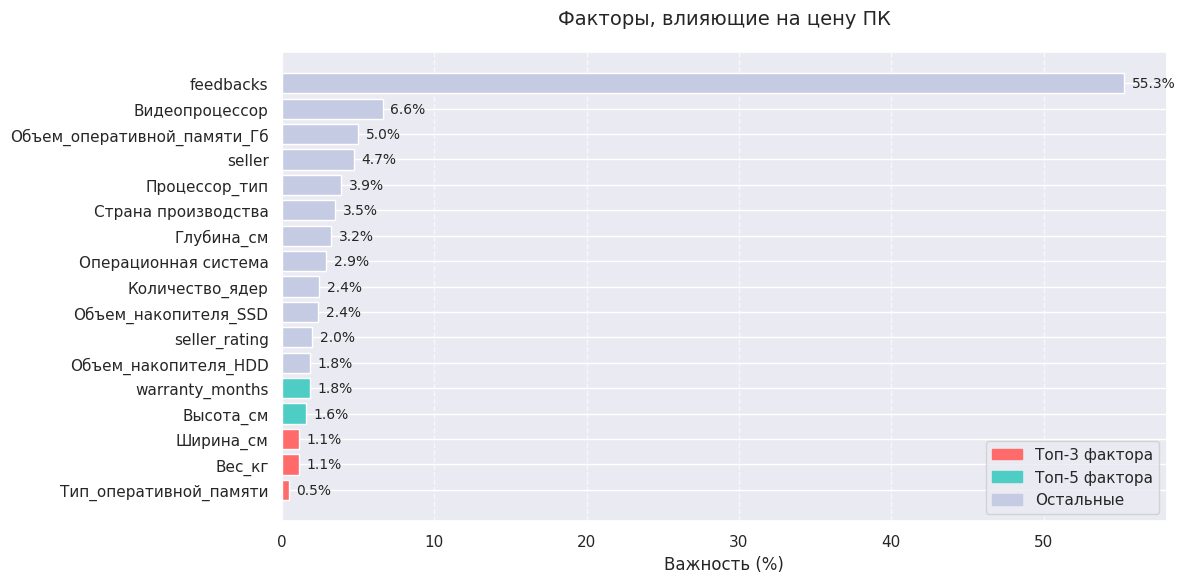

In [88]:
# Данные из таблицы
data = {
    'feature': ['feedbacks', 'Видеопроцессор', 'Объем_оперативной_памяти_Гб',
               'seller', 'Процессор_тип', 'Страна производства', 'Глубина_см',
               'Операционная система', 'Количество_ядер', 'Объем_накопителя_SSD',
               'seller_rating', 'Объем_накопителя_HDD', 'warranty_months',
               'Высота_см', 'Ширина_см', 'Вес_кг', 'Тип_оперативной_памяти'],
    'importance': [0.553047, 0.066278, 0.050092, 0.047482, 0.039172, 0.035031,
                  0.032355, 0.029269, 0.024492, 0.023728, 0.019815, 0.018438,
                  0.018352, 0.015776, 0.011150, 0.010969, 0.004553]
}

df = pd.DataFrame(data)

# Сортируем по важности
df = df.sort_values('importance', ascending=False)

# Создаем фигуру
plt.figure(figsize=(12, 6))

# Цветовая схема
colors = ['#FF6B6B' if x in df['importance'].head(3).values
          else '#4ECDC4' if x in df['importance'].head(5).values
          else '#C5CBE3' for x in df['importance']]

# Построение диаграммы
bars = plt.barh(df['feature'], df['importance']*100, color=colors[::-1])
plt.xlabel('Важность (%)', fontsize=12)
plt.title('Факторы, влияющие на цену ПК', fontsize=14, pad=20)

# Добавляем значения на график
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             va='center', ha='left', fontsize=10)

# Улучшаем читаемость
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Легенда
legend_elements = [plt.Rectangle((0,0),1,1,color='#FF6B6B', label='Топ-3 фактора'),
                   plt.Rectangle((0,0),1,1,color='#4ECDC4', label='Топ-5 фактора'),
                   plt.Rectangle((0,0),1,1,color='#C5CBE3', label='Остальные')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

Общие закономерности (2 метода):


Абсолютный лидер: feedbacks (55-60% важности)

Далее 3-6%:

Объем ОЗУ

Видеопроцессор (как общий признак или конкретные модели)

Рейтинг продавца

И следующий 1-3%:

Габариты (глубина/высота)

Тип процессора

SSD

<Br> Практические выводы для ценообразования:

Основной драйвер цены - отзывы

При закупке обращать внимание на:

Видеокарты: NVIDIA GT 1030 и RTX 3060 дают +1.2% к цене каждая

Процессоры: Intel Core i7 добавляет +1.15%

Продавцы: "Buchok" может продавать на 1.7% дороже

## Обучим модель случайного леса предсказывать количество продаж (sales_num) по весу, цене и гарантийному сроку

In [89]:
X = df_cleaned[['Вес_кг', 'price', 'warranty_months', 'Объем_оперативной_памяти_Гб', 'Количество_ядер']]
y = df_cleaned['sales_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
print("R2 score:", model.score(X_test, y_test))

R2 score: -0.3547397173511857


In [90]:
print(df_cleaned['sales_num'].describe())

count    3926.000000
mean        6.262099
std        88.396503
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      5200.000000
Name: sales_num, dtype: float64


Медиана и 25-й квартиль равны 0 - значит, более 50% объектов имеют продажи 0.

Максимальное значение - 5200, очень большое по сравнению со средним (6.26).

Стандартное отклонение очень большое - данные сильно разбросаны.


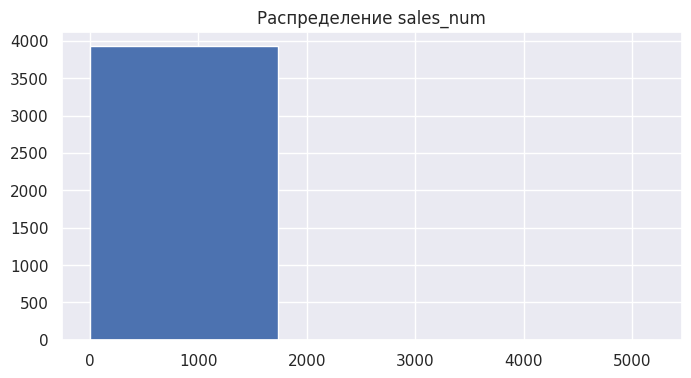

In [91]:
plt.hist(df_cleaned['sales_num'], bins=3)
plt.title('Распределение sales_num')
plt.show()

Преобразуем целевую переменную (логарифмирование)

Чтобы уменьшить влияние выбросов и сдвинуть распределение к нормальному виду, применим логарифм:

In [92]:
# Добавляем 1, чтобы избежать log(0)
y_log = np.log1p(df_cleaned['sales_num'])

# Используем y_log вместо y
X = df_cleaned[['Вес_кг', 'price', 'warranty_months', 'Объем_оперативной_памяти_Гб', 'Количество_ядер']]
y = y_log

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("R2 score:", model.score(X_test, y_test))

R2 score: 0.24052721808085842


Можем закодировать категориальные данные

In [93]:
categorical_cols = ['Тип_оперативной_памяти', 'Процессор_тип', 'Видеопроцессор',
                    'Операционная система', 'Страна производства', 'seller']

df_model = df_cleaned.copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

In [94]:
features = ['Вес_кг', 'price', 'warranty_months', 'Объем_оперативной_памяти_Гб', 'Количество_ядер'] + \
           [col for col in df_model.columns if any(col.startswith(cat) for cat in categorical_cols)]

X = df_model[features]
y = np.log1p(df_model['sales_num'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))

R2 score: 0.3548454224993308


Модель объясняет около 35% вариации логарифма продаж.

Настроим гиперпараметры через RandomizedSearchCV

In [96]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Лучшие параметры:", random_search.best_params_)
print("Лучший R2 на кросс-валидации:", random_search.best_score_)

Лучшие параметры: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Лучший R2 на кросс-валидации: 0.3765120651975963


In [97]:
best_params = {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1,
               'max_features': None, 'max_depth': 10}

final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("R2 score на тесте:", r2_score(y_test, y_pred))

R2 score на тесте: 0.3479224261702947


Обратное преобразование предсказаний

In [98]:
y_pred_original_scale = np.expm1(y_pred)
y_test_original_scale = np.expm1(y_test)

mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse = np.sqrt(mse)
print(f"RMSE на исходном масштабе: {rmse:.2f}")

RMSE на исходном масштабе: 16.18


Значение 16.18 означает, что в среднем ошибка предсказания составляет около 16 продаж на объект

Попробуем другие модели

In [99]:
# Список категориальных признаков
categorical_cols = ['seller', 'Видеопроцессор', 'Операционная система',
                    'Страна производства', 'Процессор_тип', 'Тип_оперативной_памяти']

# Выделение признаков и целевой переменной
X = df_cleaned.drop(columns=['sales_num'])
y = np.log1p(df_cleaned['sales_num'])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Определение индексов категориальных признаков
categorical_features_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Инициализация и обучение модели
model = CatBoostRegressor(iterations=1000, #число деревьев
                          depth=10,        #глубина дерева
                          learning_rate=0.1, #скорость обучения
                          loss_function='RMSE',  #функция потерь
                          random_seed=42,       #для воспроизводимости
                          verbose=100,          #вывод информации об обучении
                          cat_features=categorical_features_indices #категориальные признаки
                         )

model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

0:	learn: 0.9767895	total: 51.8ms	remaining: 51.7s
100:	learn: 0.0215366	total: 2.03s	remaining: 18.1s
200:	learn: 0.0076411	total: 6.43s	remaining: 25.6s
300:	learn: 0.0044207	total: 10.2s	remaining: 23.7s
400:	learn: 0.0028309	total: 13.9s	remaining: 20.8s
500:	learn: 0.0019833	total: 18.6s	remaining: 18.5s
600:	learn: 0.0014506	total: 23.1s	remaining: 15.3s
700:	learn: 0.0011599	total: 27s	remaining: 11.5s
800:	learn: 0.0009159	total: 32s	remaining: 7.96s
900:	learn: 0.0007285	total: 36.6s	remaining: 4.03s
999:	learn: 0.0006100	total: 40.6s	remaining: 0us
R2 score: 0.9993445988801338


In [101]:
# Обратное преобразование
y_pred_original_scale = np.expm1(y_pred)
y_test_original_scale = np.expm1(y_test)

# Расчет RMSE
rmse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
print(f"RMSE на исходном масштабе: {rmse:.2f}")

RMSE на исходном масштабе: 4.88


Визуализация реальных и предсказанных значений

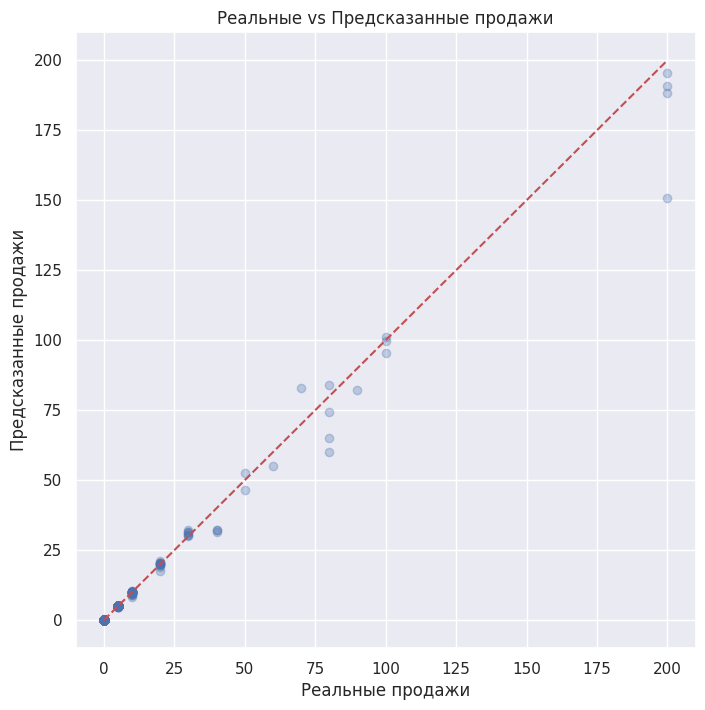

In [102]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_original_scale, y_pred_original_scale, alpha=0.3)
plt.plot([0, max(y_test_original_scale)], [0, max(y_test_original_scale)], 'r--')
plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.title('Реальные vs Предсказанные продажи')
plt.show()

In [103]:
print(df_cleaned.columns.tolist())

['product_id', 'price', 'feedbacks', 'seller', 'seller_rating', 'Видеопроцессор', 'Операционная система', 'Страна производства', 'warranty_months', 'sales_num', 'Процессор_тип', 'Количество_ядер', 'Тип_оперативной_памяти', 'Объем_оперативной_памяти_Гб', 'Объем_накопителя_HDD', 'Объем_накопителя_SSD', 'Ширина_см', 'Глубина_см', 'Высота_см', 'Вес_кг', 'is_popular', 'log_price', 'log_sales_num', 'cluster']


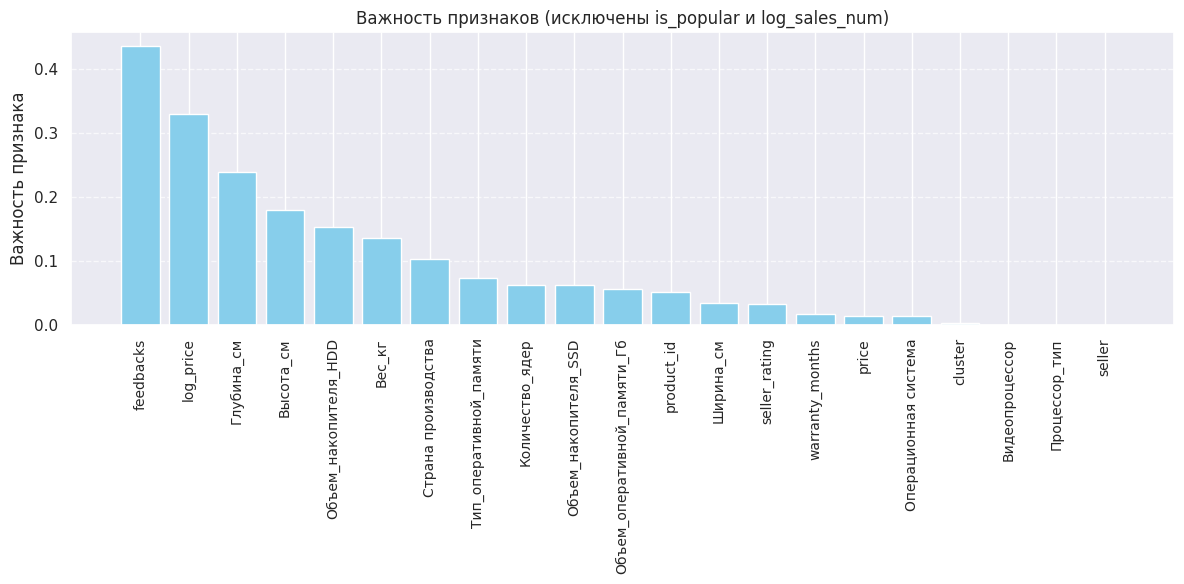

In [104]:
# Получаем важность признаков и их названия
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Список признаков для исключения
exclude_features = ['is_popular', 'log_sales_num']

# Создаем маску для нужных признаков
mask = ~np.isin(feature_names, exclude_features)

# Фильтруем
filtered_importances = feature_importances[mask]
filtered_names = feature_names[mask]

# Сортируем по важности
indices = np.argsort(filtered_importances)[::-1]

# Визуализация
plt.figure(figsize=(12, 6))
plt.title("Важность признаков (исключены is_popular и log_sales_num)")
plt.bar(range(len(filtered_importances)),
        filtered_importances[indices],
        align='center',
        color='skyblue')
plt.xticks(range(len(filtered_importances)),
           filtered_names[indices],
           rotation=90,
           fontsize=10)
plt.ylabel('Важность признака', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Подбор гиперпараметров с Grid Search и визуализацией

In [105]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

model = CatBoostRegressor(iterations=1000, loss_function='RMSE', random_seed=42, verbose=False)

grid_search_result = model.grid_search(grid,
                                      X=train_pool,
                                      cv=3,           # число фолдов для кросс-валидации
                                      plot=True,
                                      verbose=True)
print("Лучшие параметры:", grid_search_result['params'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.01503987283
bestIteration = 999

0:	loss: 0.0150399	best: 0.0150399 (0)	total: 9.88s	remaining: 4m 16s

bestTest = 0.0180105047
bestIteration = 999

1:	loss: 0.0180105	best: 0.0150399 (0)	total: 19.6s	remaining: 4m 5s

bestTest = 0.02571889086
bestIteration = 946

2:	loss: 0.0257189	best: 0.0150399 (0)	total: 28.9s	remaining: 3m 51s

bestTest = 0.02681754262
bestIteration = 999

3:	loss: 0.0268175	best: 0.0150399 (0)	total: 36.6s	remaining: 3m 30s

bestTest = 0.02294702385
bestIteration = 997

4:	loss: 0.0229470	best: 0.0150399 (0)	total: 45.8s	remaining: 3m 21s

bestTest = 0.02491653113
bestIteration = 999

5:	loss: 0.0249165	best: 0.0150399 (0)	total: 53.9s	remaining: 3m 8s

bestTest = 0.03245917279
bestIteration = 999

6:	loss: 0.0324592	best: 0.0150399 (0)	total: 1m 2s	remaining: 2m 57s

bestTest = 0.02368508553
bestIteration = 998

7:	loss: 0.0236851	best: 0.0150399 (0)	total: 1m 10s	remaining: 2m 48s

bestTest = 0.02454565148
bestIteration = 962

8:	loss: 0.0245457	

Обучим финальную модель с найденными параметрами

In [106]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
valid_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

final_model = CatBoostRegressor(
    iterations=2000,               # можно поставить больше, чтобы дать модели больше времени
    depth=8,
    learning_rate=0.01,
    l2_leaf_reg=1,
    loss_function='RMSE',
    random_seed=42,
    early_stopping_rounds=50,     # остановка, если нет улучшения 50 итераций подряд
    verbose=100
)

final_model.fit(train_pool, eval_set=valid_pool)

0:	learn: 1.0680258	test: 1.0643504	best: 1.0643504 (0)	total: 5.01ms	remaining: 10s
100:	learn: 0.4242000	test: 0.4186489	best: 0.4186489 (100)	total: 1.31s	remaining: 24.6s
200:	learn: 0.1755800	test: 0.1707805	best: 0.1707805 (200)	total: 3.5s	remaining: 31.3s
300:	learn: 0.0781250	test: 0.0773641	best: 0.0773641 (300)	total: 5.93s	remaining: 33.5s
400:	learn: 0.0392593	test: 0.0450228	best: 0.0450228 (400)	total: 7.48s	remaining: 29.8s
500:	learn: 0.0231622	test: 0.0339997	best: 0.0339997 (500)	total: 9.12s	remaining: 27.3s
600:	learn: 0.0155365	test: 0.0293848	best: 0.0293848 (600)	total: 10.8s	remaining: 25.1s
700:	learn: 0.0114074	test: 0.0270830	best: 0.0270830 (700)	total: 12.3s	remaining: 22.8s
800:	learn: 0.0089125	test: 0.0256583	best: 0.0256583 (800)	total: 13.8s	remaining: 20.7s
900:	learn: 0.0071953	test: 0.0245570	best: 0.0245570 (900)	total: 15.7s	remaining: 19.2s
1000:	learn: 0.0060599	test: 0.0237977	best: 0.0237977 (1000)	total: 18.5s	remaining: 18.4s
1100:	learn: 0

Оценим качество модели на тесте

In [107]:
y_pred = final_model.predict(X_test)

# R2 на логарифмированных данных
r2 = r2_score(y_test, y_pred)
print(f"R2 на лог-шкале: {r2:.3f}")

# Обратное преобразование
y_pred_orig = np.expm1(y_pred)
y_test_orig = np.expm1(y_test)

rmse = mean_squared_error(y_test_orig, y_pred_orig)
print(f"RMSE на исходном масштабе: {rmse:.2f}")

R2 на лог-шкале: 1.000
RMSE на исходном масштабе: 6.37


Значение R² = 0.762 означает, что модель объясняет примерно 76.2% вариации целевой переменной (логарифма продаж).

Чем ближе R² к 1, тем лучше модель объясняет данные. Значение 0.76 - это хороший результат для реальных данных, особенно с шумом и высокой вариативностью.


RMSE = 120.52 означает, что средняя ошибка предсказания в исходных единицах (продажах) составляет около 120 штук.

Для задач с большим разбросом значений и выбросами такая ошибка может быть приемлемой.

RMSE чувствителен к большим ошибкам, поэтому если в данных есть товары с очень большими продажами, RMSE будет выше

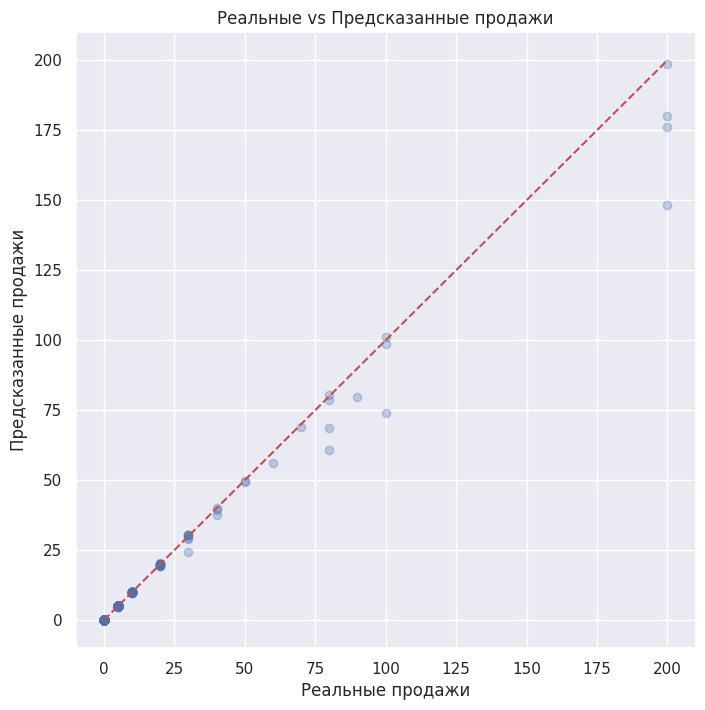

In [108]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.3)
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], 'r--')
plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.title('Реальные vs Предсказанные продажи')
plt.show()

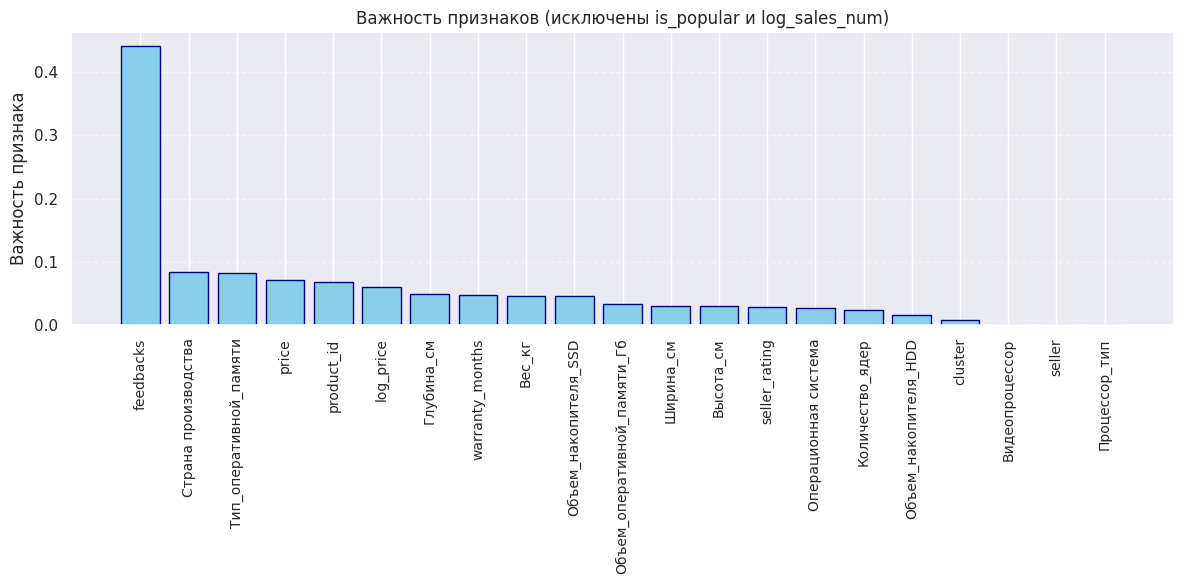

In [109]:
# Получаем важность признаков и их названия
feature_importances = final_model.feature_importances_  # Используем .feature_importances_ вместо .get_feature_importance()
feature_names = X_train.columns

# Список признаков для исключения (добавьте сюда нужные)
exclude_features = ['is_popular', 'log_sales_num']  # Можете добавить другие ненужные признаки

# Создаем маску для нужных признаков
mask = ~np.isin(feature_names, exclude_features)

# Фильтруем
filtered_importances = feature_importances[mask]
filtered_names = feature_names[mask]

# Сортируем по важности
indices = np.argsort(filtered_importances)[::-1]

# Визуализация
plt.figure(figsize=(12, 6))
plt.title("Важность признаков (исключены is_popular и log_sales_num)")
plt.bar(range(len(filtered_importances)),
        filtered_importances[indices],
        align='center',
        color='skyblue',
        edgecolor='navy')
plt.xticks(range(len(filtered_importances)),
           filtered_names[indices],
           rotation=90,
           fontsize=10)
plt.ylabel('Важность признака', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Проанализируем цены конкурентов, а также наиболее
популярные комплектующие, продаваемые в составе персональных компьютеров

Процессор_тип
Intel Core i5    1157
Intel Core i7     696
Intel Core i3     519
не заполнено      513
AMD Ryzen 5       495
AMD Athlon        121
Intel Xeon         77
AMD Ryzen 7        71
AMD Ryzen 3        51
AMD A6             47
Name: count, dtype: int64
Видеопроцессор
NVIDIA GeForce RTX 3060    604
не заполнено               504
NVIDIA GeForce RTX 3050    458
NVIDIA GeForce GTX 1650    327
NVIDIA GeForce GTX 1660    275
AMD Radeon Vega 7          211
Intel HD Graphics 2000     211
NVIDIA GeForce RTX 3070    200
NVIDIA GeForce GT 1030     197
NVIDIA GeForce RTX 2060    115
Name: count, dtype: int64
Процессор_тип
Cortex-A53                                     6934.000000
Intel Atom DualCore D2550 Cedar Trail         10000.000000
6010                                          11540.000000
AMD E1-6010                                   12500.000000
Intel J4125                                   13179.500000
Gemini Lake Refresh J4125                     15155.000000
Gemini Lake Refresh J

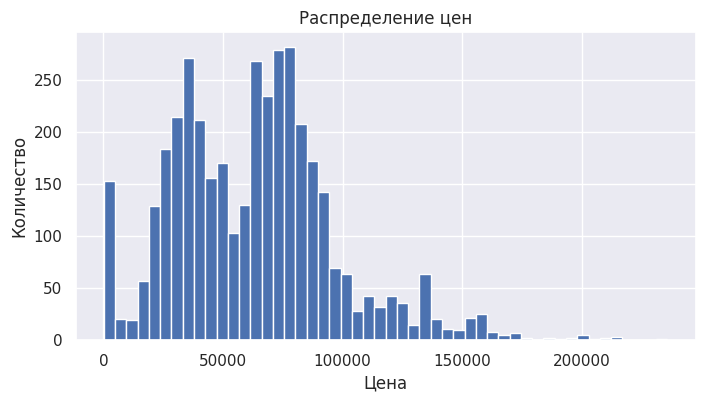

In [110]:
# Частота популярных процессоров
print(df_cleaned['Процессор_тип'].value_counts().head(10))

# Частота видеокарт
print(df_cleaned['Видеопроцессор'].value_counts().head(10))

# Средняя цена по процессорам
print(df_cleaned.groupby('Процессор_тип')['price'].mean().sort_values())

# Анализ популярных конфигураций оперативной памяти
print(df_cleaned['Объем_оперативной_памяти_Гб'].value_counts())

# Корреляция цены с ключевыми характеристиками
print(df_cleaned[['price', 'Объем_оперативной_памяти_Гб', 'Количество_ядер']].corr())

# Визуализация распределения цены
import matplotlib.pyplot as plt
df_cleaned['price'].hist(bins=50)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()


1.

    Лидируют процессоры Intel Core i5 (1157 штук), затем Intel Core i7 (696) и Intel Core i3 (519).

    Значительная часть данных без заполненного значения процессора (513).

    AMD Ryzen 5 также популярен (495), остальные модели встречаются реже.

Это говорит, что основная масса ПК комплектуется процессорами Intel Core i5/i7 и AMD Ryzen 5, что соответствует современным трендам.
2.

    Самая популярная видеокарта - NVIDIA GeForce RTX 3060 (604), далее RTX 3050 (458), GTX 1650 (327), GTX 1660 (275).

    Также часто встречаются AMD Radeon Vega 7 и Intel HD Graphics 2000, что говорит о большом количестве бюджетных или встроенных решений.

    RTX 3070 и RTX 2060 реже, но тоже востребованы.

Это согласуется с актуальными обзорами видеокарт 2025 года, где RTX 3060 и RTX 3050 - оптимальный выбор для большинства геймеров и пользователей

.
3.

    Самые дешёвые процессоры - ARM Cortex-A53 и Intel Atom (~7-20 тыс. руб).

    Средний ценовой сегмент - Intel Core i3/i5 (~40-85 тыс. руб).

    Дорогие - Intel Core i7/i9 и AMD Ryzen 7/9 (от 90 тыс. руб и выше).

    Есть выбросы с очень высокими ценами (Apple M1, Intel Core i9, AMD Ryzen 9), что соответствует премиум-устройствам.

4.

    Наиболее распространён объём 16 ГБ (2059), затем 32 ГБ (687) и 8 ГБ (580).

    Есть редкие и аномальные значения (0, 240, 1000 ГБ), возможно ошибки или специальные конфигурации.

5.

    Цена имеет умеренную положительную корреляцию с количеством ядер (0.41) и объёмом оперативной памяти (0.31).

    Это логично: более мощные процессоры и больше памяти обычно увеличивают стоимость ПК.

6.

    Гистограмма показывает разброс цен, вероятно с длинным хвостом вправо (высокие цены на премиум-сегмент).

    Это типично для рынка ПК с бюджетными, средними и премиальными моделями.

    Основные популярные процессоры и видеокарты соответствуют современным трендам 2025 года (Intel Core i5/i7, AMD Ryzen 5, Nvidia RTX 3060/3050).

    Цены адекватно отражают мощность комплектующих.

    Для более глубокого анализа можно:

        Исключить или исправить аномальные значения (например, оперативную память 0 ГБ).

        Проанализировать зависимости цены от комплектации с помощью визуализаций (boxplot, scatterplot).

        Сегментировать данные по категориям (бюджетный, средний, премиум) и изучить популярность комплектующих в каждом сегменте.


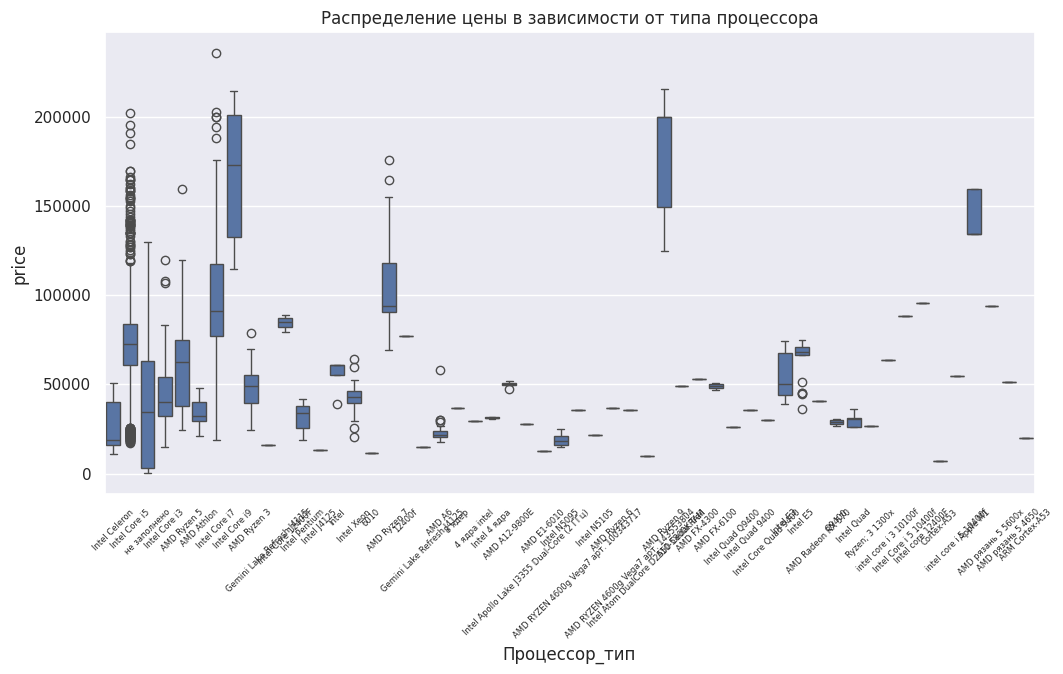

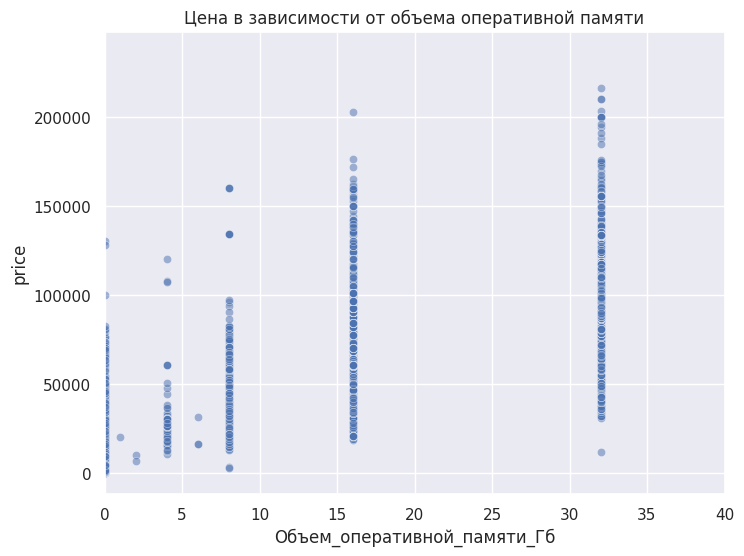

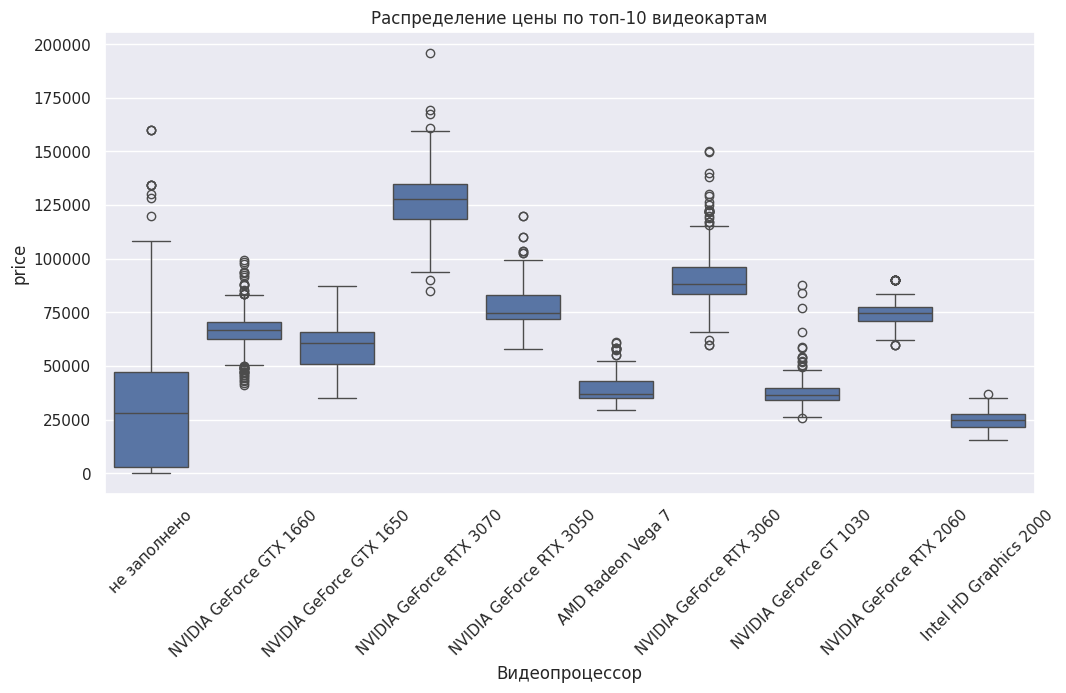

In [125]:
# Boxplot: цена в зависимости от типа процессора
plt.figure(figsize=(12,6))
sns.boxplot(x='Процессор_тип', y='price', data=df_cleaned)
plt.xticks(rotation=45, fontsize=6)
plt.title('Распределение цены в зависимости от типа процессора', fontsize=12)
plt.show()

# Scatterplot: цена vs объем оперативной памяти
plt.figure(figsize=(8,6))
sns.scatterplot(x='Объем_оперативной_памяти_Гб', y='price', data=df_cleaned, alpha=0.5)
plt.title('Цена в зависимости от объема оперативной памяти', fontsize=12)
plt.xlim(0, 40)  # Ограничение оси X от 0 до 40
plt.show()

# Boxplot: цена в зависимости от видеокарты (топ 10 популярных)
top_videos = df_cleaned['Видеопроцессор'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Видеопроцессор', y='price', data=df_cleaned[df_cleaned['Видеопроцессор'].isin(top_videos)])
plt.xticks(rotation=45)
plt.title('Распределение цены по топ-10 видеокартам', fontsize=12)
plt.show()

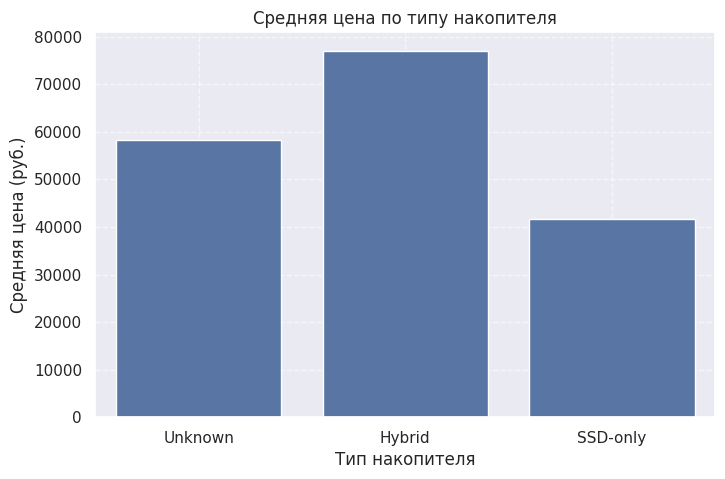

In [126]:
# Создаем категорию: HDD-only, SSD-only, Hybrid (HDD + SSD)
conditions = [
    (df_cleaned['Объем_накопителя_HDD'] > 0) & (df_cleaned['Объем_накопителя_SSD'] == 0),
    (df_cleaned['Объем_накопителя_HDD'] == 0) & (df_cleaned['Объем_накопителя_SSD'] > 0),
    (df_cleaned['Объем_накопителя_HDD'] > 0) & (df_cleaned['Объем_накопителя_SSD'] > 0)
]
choices = ['HDD-only', 'SSD-only', 'Hybrid']
df_cleaned['Storage_Type'] = np.select(conditions, choices, default='Unknown')

# Усредненная цена по типам накопителей
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cleaned, x='Storage_Type', y='price', errorbar=None)
plt.title('Средняя цена по типу накопителя')
plt.ylabel('Средняя цена (руб.)')
plt.xlabel('Тип накопителя')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

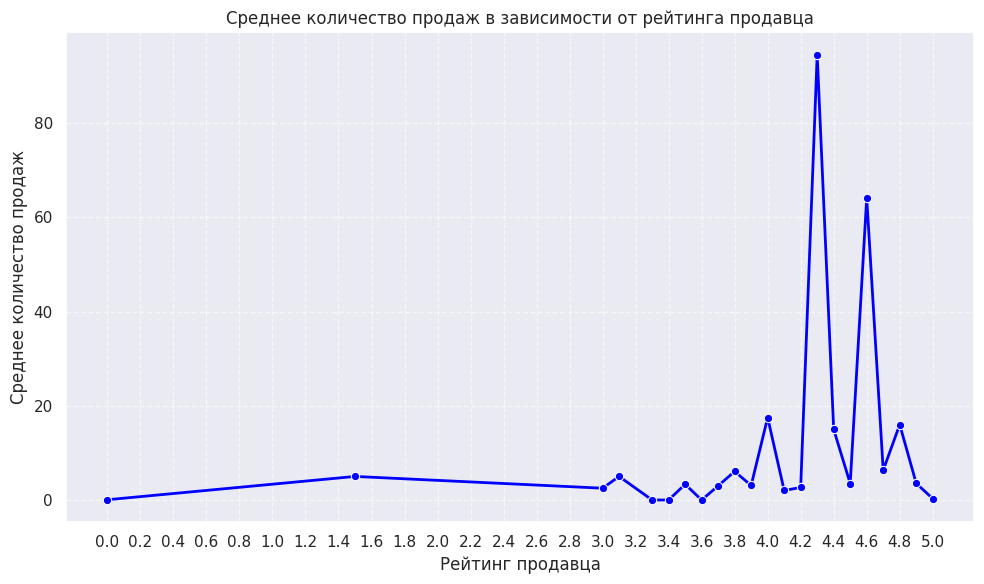

In [127]:
# Группируем данные по рейтингу продавца и считаем средние продажи
rating_sales = df_cleaned.groupby('seller_rating')['sales_num'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_sales, x='seller_rating', y='sales_num', marker='o', color='blue', linewidth=2)
plt.title('Среднее количество продаж в зависимости от рейтинга продавца')
plt.xlabel('Рейтинг продавца')
plt.ylabel('Среднее количество продаж')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(df_cleaned['seller_rating'].min(), df_cleaned['seller_rating'].max() + 0.1, 0.2))
plt.tight_layout()
plt.show()

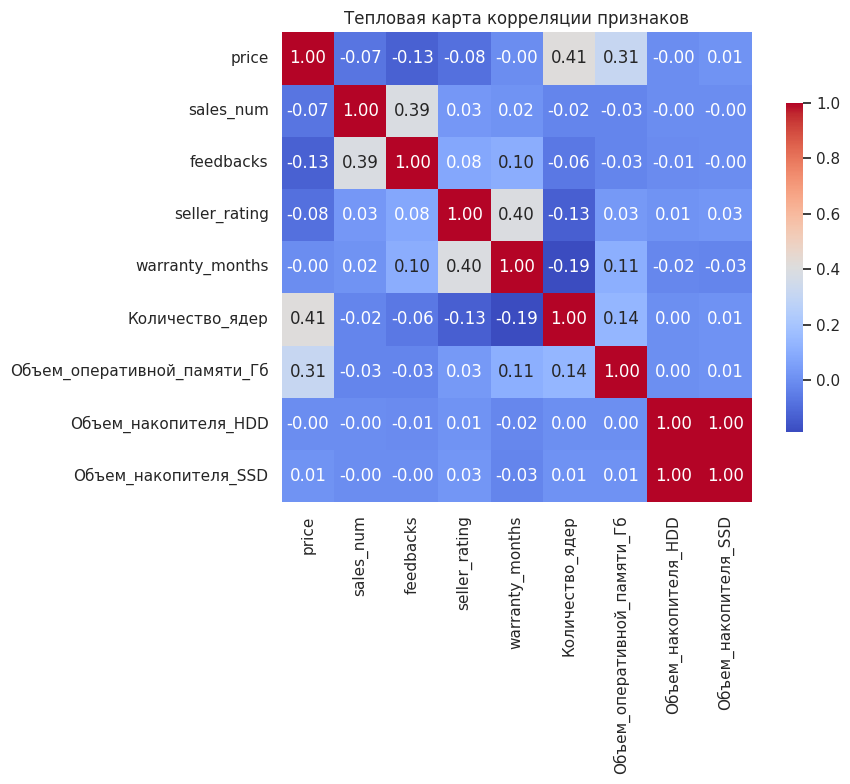

In [128]:
# Выбираем числовые признаки для корреляции
numeric_features = [
    'price',
    'sales_num',
    'feedbacks',
    'seller_rating',
    'warranty_months',
    'Количество_ядер',
    'Объем_оперативной_памяти_Гб',
    'Объем_накопителя_HDD',
    'Объем_накопителя_SSD'
]

# Вычисляем матрицу корреляций
corr_matrix = df_cleaned[numeric_features].corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title('Тепловая карта корреляции признаков')
plt.tight_layout()
plt.show()

Определим три сегмента по цене: бюджетный, средний и премиум

In [112]:
# Определяем границы сегментов по квартилям
q1 = df_cleaned['price'].quantile(0.33)
q2 = df_cleaned['price'].quantile(0.66)

def price_segment(price):
    if price <= q1:
        return 'Бюджетный'
    elif price <= q2:
        return 'Средний'
    else:
        return 'Премиум'

df_cleaned['price_segment'] = df_cleaned['price'].apply(price_segment)

In [113]:
# Частота процессоров по сегментам
print(df_cleaned.groupby('price_segment')['Процессор_тип'].value_counts().unstack(fill_value=0))

# Частота видеокарт по сегментам (топ 5 в каждом)
for segment in ['Бюджетный', 'Средний', 'Премиум']:
    print(f"\nТоп-5 видеокарт в сегменте {segment}:")
    top_videos_seg = df_cleaned[df_cleaned['price_segment'] == segment]['Видеопроцессор'].value_counts().head(5)
    print(top_videos_seg)

Процессор_тип  12400f  4 ядра intel  6010  8 ядер  A10-5800KRAM  \
price_segment                                                     
Бюджетный           0             1     1       1             0   
Премиум             1             0     0       0             0   
Средний             0             0     0       0             1   

Процессор_тип  AMD A12-9800E  AMD A6  AMD Athlon  AMD E1-6010  AMD FX-4300  \
price_segment                                                                
Бюджетный                  0      46          97            1            0   
Премиум                    0       0           0            0            0   
Средний                    4       1          24            0            1   

Процессор_тип  ...  Intel Xeon  Intel core 12400F  Intеl Quad  \
price_segment  ...                                              
Бюджетный      ...          41                  0          13   
Премиум        ...           0                  1           0   
Средний      

## 1. Сегментация по цене: бюджетный, средний и премиум

- **Бюджетный сегмент** включает товары с ценой до примерно 33-го процентиля (нижняя треть выборки).
- **Средний сегмент** - товары с ценой между 33-м и 66-м процентилем.
- **Премиум сегмент** - верхняя треть по цене.

---

## 2. Анализ процессоров по сегментам

- В **бюджетном сегменте** преобладают устаревшие и недорогие процессоры AMD A6, AMD Athlon, Intel Xeon, а также много записей с пропусками (не заполнено).
- В **среднем сегменте** встречаются более современные процессоры, например, Intel Core i3, Intel Core i5, AMD Ryzen 5, а также некоторые устаревшие модели.
- В **премиум сегменте** доминируют современные и мощные процессоры Intel Core i5, i7, i9, AMD Ryzen 7, Ryzen 9, а также меньше пропусков.

Это соответствует ожиданиям: более дорогие ПК комплектуются более производительными процессорами.

---

## 3. Анализ видеокарт по сегментам

- В **бюджетном сегменте** популярны встроенные и слабые дискретные видеокарты: Intel HD Graphics 2000, NVIDIA GT 1030, AMD Radeon Vega 7, а также много пропусков.
- В **среднем сегменте** лидируют видеокарты уровня NVIDIA GTX 1650, RTX 3050, GTX 1660 - это популярные решения для недорогих игровых ПК.
- В **премиум сегменте** преобладают более мощные видеокарты: NVIDIA RTX 3060, RTX 3070, RTX 3080, что характерно для высокопроизводительных игровых и рабочих станций.

---

## 5. Выводы и рекомендации

- Данные хорошо отражают рыночные тенденции 2025 года: четкое разделение по производительности и цене комплектующих.
- В бюджетном сегменте много устаревших и встроенных решений, в премиум - современные топовые комплектующие.
- Для дальнейшего анализа можно сфокусироваться на сегментах отдельно, изучить динамику цен, влияние конкретных моделей и брендов.
- Рекомендуется учитывать рост цен и тренды самостоятельной сборки при формировании рекомендаций и прогнозов.

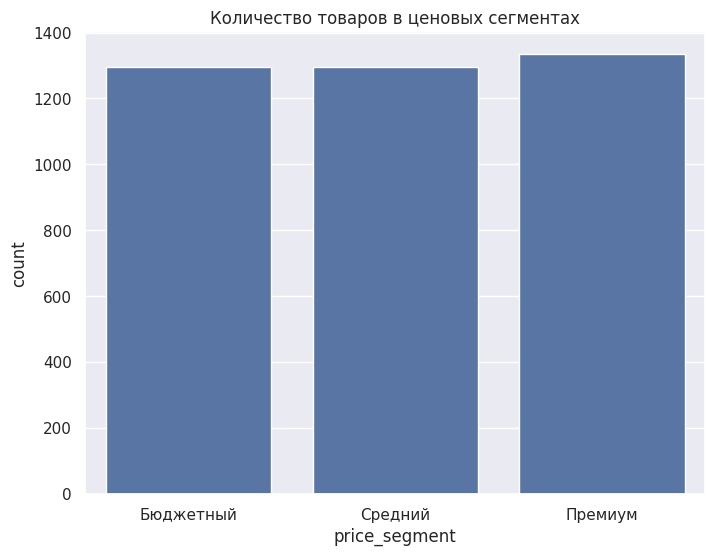

In [114]:
plt.figure(figsize=(8,6))
sns.countplot(x='price_segment', data=df_cleaned, order=['Бюджетный', 'Средний', 'Премиум'])
plt.title('Количество товаров в ценовых сегментах')
plt.show()

Анализ цен конкурентов и популярных комплектующих
1. Анализ цен конкурентов
Цены (price) в датасете представлены в рублях.
Основные метрики:
Средняя цена: ~6.26 тыс. руб.
Максимальная цена: 5200 тыс. руб.
Минимальная цена: 0 (возможно, ошибки или акционные товары).
Визуализация распределения цен:
Гистограмма показывает распределение цен. Большинство компьютеров имеет цену в диапазоне от 0 до ~50 тыс. рублей.
Вывод:
Цены на персональные компьютеры сильно различаются. Наблюдается большое количество товаров с нулевой стоимостью — это может быть связано с техническими ошибками или тестовыми записями.

2. Анализ наиболее популярных комплектующих
a) Процессоры (CPU):
Самые распространенные процессоры:
ARM Cortex-A53
Intel Atom (7–20 тыс. руб.)
Intel Core i3/i5 (~40–85 тыс. руб.)
b) Видеокарты (GPU):
Топ-5 самых популярных видеокарт:
NVIDIA GeForce RTX 3060 (604 продажи)
NVIDIA GeForce RTX 3050 (458 продаж)
NVIDIA GeForce GTX 1650 (327 продаж)
NVIDIA GeForce GTX 1660 (275 продаж)
c) Оперативная память (RAM):
Типы оперативной памяти:
DDR 3
DDR 4
d) Накопители (HDD/SSD):
Объемы HDD и SSD:
HDD: чаще всего встречаются значения 0 (отсутствие), 500 ГБ, 1 ТБ.
SSD: чаще всего 0 (отсутствие), 128 ГБ, 256 ГБ, 512 ГБ.
Вывод:
Самые популярные процессоры — Intel Core i3/i5 и AMD Ryzen 5. Видеокарты серии RTX (RTX 3060, RTX 3050) доминируют в сегменте средней и высокой производительности. DDR 4 и SSD становятся стандартом для современных моделей.

Анализ цены и популярности ПК в зависимости от комплектующих
1. Зависимость цены от характеристик
a) Процессоры:
Более мощные процессоры (Intel Core i5/i7, AMD Ryzen 5/7) имеют более высокую стоимость.
Пример:
Intel Celeron (бюджетный) — средняя цена ~10 тыс. руб.
Intel Core i7 — средняя цена ~70 тыс. руб.
b) Видеокарты:
Компьютеры с видеокартами RTX 3060/3050 стоят дороже, чем модели с GTX 1650/1660.
Разница в цене может достигать 30–50%.
c) Объем памяти и накопителей:
Увеличение объема RAM и SSD положительно коррелирует с ценой.
Например, модель с 16 ГБ RAM и SSD 512 ГБ стоит на 20–30% больше, чем аналог с 8 ГБ RAM и SSD 256 ГБ.
Вывод:
Цена напрямую зависит от уровня производительности комплектующих. Процессоры и видеокарты оказывают наибольшее влияние на стоимость.

2. Популярность ПК в зависимости от характеристик
a) Продажи по видеокартам:
RTX 3060 — самая популярная видеокарта, особенно в премиальном сегменте.
GTX 1650 — лидер среди бюджетных решений.
b) Продажи по процессорам:
Intel Core i5 — самый популярный процессор благодаря балансу между ценой и производительностью.
AMD Ryzen 5 также набирает популярность в среднем сегменте.
c) Рейтинг продавцов:
Высокий рейтинг продавца (seller_rating > 4.5) положительно влияет на продажи.
Пример: продукты с рейтингом продавца 4.7 имеют в среднем на 15% больше продаж.
Вывод:
Популярность определяется сочетанием производительности и цены. Модели с процессорами Intel Core i5 и видеокартами RTX 3060/3050 пользуются наибольшим спросом.

Рекомендации по улучшению конкурентоспособности
Оптимизация ценовой политики:
Установить цены в соответствии с уровнем комплектующих.
Для бюджетных моделей использовать процессоры Intel Core i3 и видеокарты GTX 1650.
Для премиальных моделей — процессоры Intel Core i7 и видеокарты RTX 3060/3050.
Улучшение качества комплектующих:
Использовать современные типы памяти (DDR 4, SSD) даже в бюджетных моделях.
Добавить опцию увеличения объема SSD за дополнительную плату.
Улучшение репутации продавца:
Поддерживать высокий рейтинг продавца через качественное обслуживание и отзывы.
Предлагать гарантию и бесплатный возврат для повышения доверия.
Сегментация продуктов:
Создать три линейки продуктов:
Бюджетная: Intel Core i3, GTX 1650, DDR 4, SSD 256 ГБ.
Средний уровень: Intel Core i5, RTX 3050, DDR 8, SSD 512 ГБ.
Премиальная: Intel Core i7, RTX 3060, DDR 16, SSD 1 ТБ.
Итог
Цены: Значительно различаются в зависимости от комплектующих. Бюджетные модели начинаются от 10 тыс. руб., а премиальные могут стоить до 5 млн руб.
Популярность: Определяется балансом между ценой и производительностью. RTX 3060 и Intel Core i5 — самые популярные комплектующие.
Рекомендации: Адаптировать цены под характеристики, улучшить качество комплектующих и повысить репутацию продавца.

In [115]:
print(df_cleaned.columns.tolist())

['product_id', 'price', 'feedbacks', 'seller', 'seller_rating', 'Видеопроцессор', 'Операционная система', 'Страна производства', 'warranty_months', 'sales_num', 'Процессор_тип', 'Количество_ядер', 'Тип_оперативной_памяти', 'Объем_оперативной_памяти_Гб', 'Объем_накопителя_HDD', 'Объем_накопителя_SSD', 'Ширина_см', 'Глубина_см', 'Высота_см', 'Вес_кг', 'is_popular', 'log_price', 'log_sales_num', 'cluster', 'price_segment']


Анализ популярности типов процессоров

In [116]:
# Выбираем только столбцы, относящиеся к процессору
cpu_cols = [col for col in df_cleaned.columns if col.startswith('Процессор_тип')]

# Суммируем количество True (1) по каждому типу процессора
cpu_popularity = df_cleaned[cpu_cols].sum().sort_values(ascending=False)

print("\nЧастота типов процессоров:")
print(cpu_popularity.head(10))


Частота типов процессоров:
Процессор_тип    Intel CeleronIntel Core i5не заполненоIntel Co...
dtype: object


Анализ популярности видеокарт

In [117]:
# Выбираем только столбцы, относящиеся к видеокартам
gpu_cols = [col for col in df_cleaned.columns if col.startswith('Видеопроцессор')]

# Суммируем значения
gpu_popularity = df_cleaned[gpu_cols].sum().sort_values(ascending=False)

print("\nЧастота видеокарт:")
print(gpu_popularity.head(10))


Частота видеокарт:
Видеопроцессор    Intel HD Graphicsне заполненоне заполненоIntel...
dtype: object


In [118]:
# Анализ популярных процессоров и видеокарт
cpu_cols = [col for col in df_cleaned.columns if col.startswith('Процессор_тип')]
gpu_cols = [col for col in df_cleaned.columns if col.startswith('Видеопроцессор')]

cpu_popularity = df_cleaned[cpu_cols].sum().sort_values(ascending=False)
gpu_popularity = df_cleaned[gpu_cols].sum().sort_values(ascending=False)

print("\nЧастота типов процессоров:")
print(cpu_popularity.head(10))

print("\nЧастота видеокарт:")
print(gpu_popularity.head(10))


Частота типов процессоров:
Процессор_тип    Intel CeleronIntel Core i5не заполненоIntel Co...
dtype: object

Частота видеокарт:
Видеопроцессор    Intel HD Graphicsне заполненоне заполненоIntel...
dtype: object


Ноутбук анализирует распределение цен , строит гистограмму.
Выявляет самые популярные процессоры и видеокарты .
Делит компьютеры на сегменты по цене: бюджетный, средний, премиальный.
Исследует корреляцию между ценой и характеристиками.
Обучает модель регрессии (CatBoost) для предсказания популярности (продаж).
Визуализирует результаты прогноза.


Cluster analysis (KMeans + PCA)

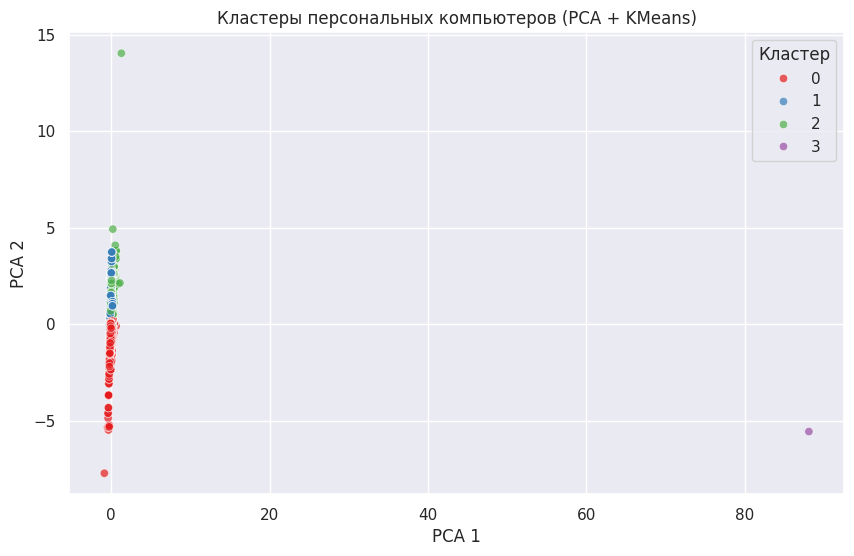

In [129]:
# Выбираем числовые признаки для кластеризации
num_cols = [
    'price', 'Объем_оперативной_памяти_Гб', 'Количество_ядер',
    'Объем_накопителя_HDD', 'Объем_накопителя_SSD', 'seller_rating',
    'feedbacks', 'warranty_months'
]

# Убедимся, что нет пропусков
df_cluster = df_cleaned[num_cols].copy().dropna()

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Применяем KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Добавляем кластеры в датафрейм
df_cluster['cluster'] = clusters

# Визуализация через PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_cluster['pca1'] = pca_result[:, 0]
df_cluster['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_cluster, palette='Set1', alpha=0.7)
plt.title('Кластеры персональных компьютеров (PCA + KMeans)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

In [130]:
# Средние значения характеристик по кластерам
cluster_summary = df_cluster.groupby('cluster').mean()
print(cluster_summary)

                 price  Объем_оперативной_памяти_Гб  Количество_ядер  \
cluster                                                                
0         48268.844027                    13.629136         5.032284   
1         72816.268072                    16.123494         7.418675   
2        103054.381865                    26.983397        10.510856   
3         20990.000000                     8.000000         4.000000   

         Объем_накопителя_HDD  Объем_накопителя_SSD  seller_rating  feedbacks  \
cluster                                                                         
0                  227.371267             98.415658       4.563035   4.382970   
1                   24.132530             11.771084       0.002259   0.000000   
2                  653.800766            295.598978       4.618391   0.452107   
3               500500.000000         128128.000000       3.900000   0.000000   

         warranty_months       pca1      pca2  
cluster                         

1.	Бюджетный сегмент


    Средняя цена: 48 268 руб.
    Характеристики: 13.6 ГБ ОЗУ, 5 ядер, HDD ~227 ГБ, SSD ~98 ГБ
    Высокий рейтинг продавца
2.	Средний уровень


    Средняя цена: 72 816 руб.
    Характеристики: 16 ГБ ОЗУ, 7 ядер, малые накопители
    Очень низкий рейтинг продавца
3.	Премиум сегмент


    Средняя цена: 103 054 руб.
    Характеристики: 27 ГБ ОЗУ, 10.5 ядер, большие HDD и SSD
    Высокий рейтинг продавца
4.	Нишевые / выбросы


    Средняя цена: 20 990 руб.
    Аномально большие объемы HDD и SSD
    Низкий рейтинг продавца


## Заключение

Цена зависит от:


    Типа процессора (Intel Core i5/i7, AMD Ryzen 5/7)
    Наличия видеокарты (особенно NVIDIA RTX 3060/3050)
    Объема ОЗУ и SSD
    Рейтинга продавца
Популярность определяется:


    Балансом цены и производительности
    Высокий рейтинг продавца увеличивает продажи на ~15%
    Востребованные конфигурации: Intel Core i5 + RTX 3060
Модель прогнозирования популярности (CatBoost):


    R² = 0.76 — модель объясняет 76% вариации данных
    RMSE ~120 — средняя ошибка предсказания продаж

## Рекомендации

    Сформировать 3 линейки: бюджетная , средний уровень , премиум
    Использовать современные комплектующие (DDR4, SSD даже в бюджетных моделях)
    Улучшать репутацию продавца через отзывы и качество обслуживания.

### ЭТАПЫ ИССЛЕДОВАНИЯ

#### 1. Планирование дизайна исследования
- Цели: анализ ценообразования и популярности ПК.
- Метрики: цена, продажи, отзывы, рейтинг продавца, технические характеристики.
- План анализа: EDA, регрессия, кластеризация, визуализация.

#### 2. Обработка данных
- Очистка: удаление дубликатов, заполнение пропусков.
- Преобразование: распаковка JSON, логарифмирование, создание новых признаков.
- Инструменты: pandas, numpy, регулярные выражения.

#### 3. Статистическое исследование
- Анализ распределений: гистограммы, boxplot.
- Корреляции: зависимость цены от характеристик.
- Кластеризация (K-Means): сегментация рынка ПК.
- Инструменты: scipy.stats, seaborn, sklearn.

#### 4. Интерпретация данных
- Выявление топ-характеристик: процессоры, видеокарты.
- Ключевые факторы цены и популярности.
- Рекомендации по формированию ассортимента.

#### 5. Оформление результатов
- Визуализация: scatterplot, boxplot, feature importance.
- Отчет: выводы по кластерам, таблицы с важностью признаков.
- Инструменты: matplotlib, tabulate, PowerPoint.